<a href="https://colab.research.google.com/github/Naman-Jain05/game-theory-fyp/blob/main/game_theory_energy_distribution_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import time

# time taken to read data
s_time_chunk = time.time()
chunk = pd.read_csv('/content/drive/MyDrive/15minute_data_austin.csv', parse_dates=['local_15min'], chunksize=1000000, on_bad_lines='skip')

# dfs = []
# for c in chunk:
#     grouped = c.groupby('dataid', group_keys=False).apply(lambda x: x.head(2880))
#     dfs.append(grouped)

e_time_chunk = time.time()

print("With chunks: ", (e_time_chunk-s_time_chunk), "sec")
ndf = pd.concat(chunk)

# Extracting desired columns and converting 'local_15min' to datetime with UTC timezone
newdf = ndf[['dataid', 'local_15min', 'grid']].copy()
newdf['local_15min'] = pd.to_datetime(newdf['local_15min'], utc=True)

newdf

With chunks:  0.017987489700317383 sec


,dataid,local_15min,grid
0,661,2018-11-21 21:15:00+00:00,0.124
1,661,2018-11-21 21:30:00+00:00,0.251
2,661,2018-11-21 21:45:00+00:00,0.419
3,661,2018-11-21 22:00:00+00:00,0.833
4,661,2018-11-21 22:15:00+00:00,1.105
...,...,...,...
873281,9278,2019-01-01 04:45:00+00:00,1.481
873282,9278,2019-01-01 05:00:00+00:00,1.043
873283,9278,2019-01-01 05:15:00+00:00,0.740
873284,9278,2019-01-01 05:30:00+00:00,0.685


In [ ]:

# Convert 'local_15min' column to datetime
newdf['local_15min'] = pd.to_datetime(newdf['local_15min'])

# Extract date from 'local_15min'
newdf['date'] = newdf['local_15min'].dt.date


# Subtract 6 from the hour values to adjust the indexing
newdf['hour'] = (newdf['local_15min'].dt.hour - 6) % 24

# Group by 'dataid', date, and hour of 'local_15min', then sum the 'grid' column
hourly_data = newdf.groupby([newdf['dataid'], newdf['date'], newdf['hour']])['grid'].sum()

print(hourly_data)

dataid  date        hour
661     2018-01-01  0        0.000
                    1        6.186
                    2        4.440
                    3        3.870
                    4        3.085
                             ...  
9922    2019-01-01  19      10.614
                    20      10.696
                    21      17.203
                    22       8.144
                    23       4.483
Name: grid, Length: 218322, dtype: float64


In [ ]:
print(hourly_data.head(30))

dataid  date        hour
661     2018-01-01  0        0.000
                    1        6.186
                    2        4.440
                    3        3.870
                    4        3.085
                    5        3.053
                    6        3.135
                    7        3.249
                    8        2.332
                    9       -2.756
                    10      -0.829
                    11      -3.264
                    12      -1.376
                    13       2.195
                    14       3.068
                    15      15.672
                    16      11.930
                    17       8.746
        2018-01-02  0        3.968
                    1        3.091
                    2        2.614
                    3        2.779
                    4        2.681
                    5        3.002
                    6        2.476
                    7        2.993
                    8        2.671
                    9        1

In [ ]:
# Filter the DataFrame for the specific timestamp
filtered_data = newdf[(newdf['dataid'] == 661) &
                      (newdf['local_15min'].dt.date == pd.to_datetime('2018-01-01').date()) &
                      (newdf['hour'] == 1)]

# Print the 'grid' values
print(filtered_data['grid'])

422    1.447
423    1.633
424    1.410
425    1.696
Name: grid, dtype: float64


In [ ]:
# Extract top 720 rows for each building
monthly_data = hourly_data.groupby('dataid').head(720)

print(monthly_data)

dataid  date        hour
661     2018-01-01  0       0.000
                    1       6.186
                    2       4.440
                    3       3.870
                    4       3.085
                            ...  
9922    2018-01-31  1       4.490
                    2       4.636
                    3       3.855
                    4       4.627
                    5       4.555
Name: grid, Length: 18000, dtype: float64


In [ ]:
monthly_data.head(30)


dataid  date        hour
661     2018-01-01  0        0.000
                    1        6.186
                    2        4.440
                    3        3.870
                    4        3.085
                    5        3.053
                    6        3.135
                    7        3.249
                    8        2.332
                    9       -2.756
                    10      -0.829
                    11      -3.264
                    12      -1.376
                    13       2.195
                    14       3.068
                    15      15.672
                    16      11.930
                    17       8.746
        2018-01-02  0        3.968
                    1        3.091
                    2        2.614
                    3        2.779
                    4        2.681
                    5        3.002
                    6        2.476
                    7        2.993
                    8        2.671
                    9        1

In [ ]:
entries_720_to_800 = monthly_data.iloc[20:26]

entries_720_to_800

dataid  date        hour
661     2018-01-02  2       2.614
                    3       2.779
                    4       2.681
                    5       3.002
                    6       2.476
                    7       2.993
Name: grid, dtype: float64

In [ ]:
data = monthly_data.values.reshape(25, 720)
# Set negative values to zero
data[data < 0] = 0

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')
yearly_data = pd.read_csv('/content/gdrive/My Drive/SupplierDataYearly.csv')
yearly_data

Mounted at /content/gdrive


,Period,Residential,Commercial,Industrial,Transportation,All Sectors
0,2013,12.13,10.26,6.89,10.55,10.07
1,2014,12.52,10.74,7.10,10.45,10.44
2,2015,12.65,10.64,6.91,10.09,10.41
3,2016,12.55,10.43,6.76,9.63,10.27
4,2017,12.89,10.66,6.88,9.68,10.48
5,2018,12.87,10.67,6.92,9.70,10.53
6,2019,13.01,10.68,6.81,9.66,10.54
7,2020,13.15,10.59,6.67,9.90,10.59
8,2021,13.66,11.22,7.18,10.20,11.10
9,2022,15.04,12.41,8.32,11.59,12.36


In [ ]:
monthly_data = pd.read_csv('/content/gdrive/My Drive/SupplierDataMonthly.csv')
monthly_data

,Period,Residential,Commercial,Industrial,Transportation,All Sectors
0,2021 January,12.62,10.27,6.32,9.48,10.29
1,February,13.01,11.36,7.75,9.92,11.16
2,March,13.24,11.08,6.98,9.70,10.84
3,April,13.73,10.87,6.70,10.03,10.63
4,May,13.86,10.86,6.65,10.03,10.69
5,June,13.83,11.33,7.22,10.42,11.25
6,July,13.83,11.46,7.42,10.29,11.45
7,August,13.92,11.52,7.54,10.27,11.55
8,Sept,14.14,11.65,7.61,11.15,11.59
9,October,14.06,11.52,7.44,10.25,11.24


In [ ]:
latest_price = yearly_data.iloc[3][1:].values
latest_price

array([12.55, 10.43,  6.76,  9.63, 10.27])

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tqdm import tqdm  # Import tqdm

class Consumer:
    def __init__(self, consumption_data):
        self.demand = []
        self.consumption_data = consumption_data
        self.sigma_n_b = 0
        self.Q_max = 0
        self.Q_min = 0
        self.penalty_coefficient = 0
        self.consumption = []
        self.fill_data()


    def fill_data(self):
        num_days = 30
        hours_per_day = 24
        total_hours = num_days * hours_per_day

        # Generate random energy consumption data
        # consumption_data = np.random.rand(total_hours) * 1000  # Random consumption values in kWh
        # Assuming consumption_data is a list/array containing historical consumption data including the last 24 hours
        consumption_data_without_current_hour_consumption = self.consumption_data[:-24]

        # Step 1: Determine the range of past consumption data to consider
        range_of_past_consumption_data = consumption_data_without_current_hour_consumption

        # Step 2: Find the maximum and minimum values within that range
        self.Q_max = max(range_of_past_consumption_data)
        self.Q_min = np.mean(range_of_past_consumption_data)

        # Prepare data for LSTM training
        sequence_length = 24  # Number of past hours to consider for prediction
        X = []
        y = []
        for i in range(total_hours - sequence_length):
            X.append(self.consumption_data[i:i+sequence_length])
            y.append(self.consumption_data[i+sequence_length])

        X = np.array(X)
        y = np.array(y)

        # Normalize the data
        X_mean = X.mean()
        X_std = X.std()
        X = (X - X_mean) / X_std
        y_mean = y.mean()
        y_std = y.std()
        y = (y - y_mean) / y_std

        # Reshape input data for LSTM
        X = X.reshape(-1, sequence_length, 1)

        # Define and train LSTM model
        model = keras.Sequential([
            layers.LSTM(units=64, input_shape=(sequence_length, 1)),
            layers.Dense(units=1)
        ])

        model.compile(optimizer='adam', loss='mse')

        # Integrate tqdm into the training loop
        epochs = 10
        batch_size = 32
        for _ in tqdm(range(epochs), desc='Training Model'):
            for i in range(0, len(X), batch_size):
                batch_X, batch_y = X[i:i+batch_size], y[i:i+batch_size]
                model.train_on_batch(batch_X, batch_y)

        # Use the trained model to predict next 24 hours energy consumption
        last_24_hours_data = self.consumption_data[-sequence_length:]  # Last 24 hours data
        predicted_consumption = []

        for i in range(24):
            last_24_hours_data_normalized = (last_24_hours_data - X_mean) / X_std
            last_24_hours_data_normalized = last_24_hours_data_normalized.reshape(1, sequence_length, 1)

            next_hour_prediction = model.predict(last_24_hours_data_normalized)
            next_hour_consumption = next_hour_prediction * y_std + y_mean
            predicted_consumption.append(next_hour_consumption[0][0])

            # Update last_24_hours_data for the next prediction
            last_24_hours_data = np.append(last_24_hours_data[1:], next_hour_consumption[0][0])

        # Calculate sigma b
        differences = np.abs(predicted_consumption - self.consumption_data[-24:])
        self.sigma_n_b = np.mean(differences)

        # Fill demand and consumption arrays
        self.demand = predicted_consumption
        self.consumption = self.consumption_data[-24:]

    def update_schedule(self):
        old_demand = self.demand
        # based on the new prices see if schedule has to be updated
        # self.demand = # new demand implementation
        return self.demand == old_demand


In [ ]:

# Define the number of consumers and the ranges for their attributes
num_consumers = 25  # You can change this value as needed

# Generate random values for each consumer attribute within the specified ranges'
consumers = [
    Consumer(data[i])
    for i in range(num_consumers)
]

Training Model: 100%|██████████| 10/10 [00:06<00:00,  1.48it/s]


1/1 [==============================] - 0s 31ms/step


Training Model: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]


1/1 [==============================] - 0s 22ms/step


Training Model: 100%|██████████| 10/10 [00:07<00:00,  1.29it/s]


1/1 [==============================] - 0s 20ms/step


Training Model: 100%|██████████| 10/10 [00:06<00:00,  1.48it/s]


1/1 [==============================] - 0s 19ms/step


Training Model: 100%|██████████| 10/10 [00:06<00:00,  1.65it/s]


1/1 [==============================] - 0s 21ms/step


Training Model: 100%|██████████| 10/10 [00:07<00:00,  1.31it/s]


1/1 [==============================] - 0s 30ms/step


Training Model: 100%|██████████| 10/10 [00:07<00:00,  1.28it/s]


1/1 [==============================] - 0s 21ms/step


Training Model: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]


1/1 [==============================] - 0s 23ms/step


Training Model: 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


1/1 [==============================] - 0s 21ms/step


Training Model: 100%|██████████| 10/10 [00:06<00:00,  1.47it/s]


1/1 [==============================] - 0s 19ms/step


Training Model: 100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


1/1 [==============================] - 0s 28ms/step


Training Model: 100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


1/1 [==============================] - 0s 20ms/step


Training Model: 100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


1/1 [==============================] - 0s 22ms/step


Training Model: 100%|██████████| 10/10 [00:05<00:00,  1.69it/s]


1/1 [==============================] - 0s 28ms/step


Training Model: 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


1/1 [==============================] - 0s 20ms/step


Training Model: 100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


1/1 [==============================] - 0s 20ms/step


Training Model: 100%|██████████| 10/10 [00:06<00:00,  1.67it/s]


1/1 [==============================] - 0s 25ms/step


Training Model: 100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


1/1 [==============================] - 0s 20ms/step


Training Model: 100%|██████████| 10/10 [00:06<00:00,  1.49it/s]


1/1 [==============================] - 0s 21ms/step


Training Model: 100%|██████████| 10/10 [00:05<00:00,  1.67it/s]


1/1 [==============================] - 0s 21ms/step


Training Model: 100%|██████████| 10/10 [00:08<00:00,  1.13it/s]


1/1 [==============================] - 0s 21ms/step


Training Model: 100%|██████████| 10/10 [00:07<00:00,  1.30it/s]


1/1 [==============================] - 0s 21ms/step


Training Model: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]


1/1 [==============================] - 0s 28ms/step


Training Model: 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


1/1 [==============================] - 0s 22ms/step


Training Model: 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


1/1 [==============================] - 0s 29ms/step


In [ ]:
def print_consumer_data(consumers):
    for i, consumer in enumerate(consumers, start=1):
        print(f"Consumer {i}:")
        print("Estimated Demand for Next 24 Hours:")
        print(consumer.demand)
        print("Actual Consumption for Next 24 Hours:")
        print(consumer.consumption)
        print("Sigma b (Average Deviation):", consumer.sigma_n_b)
        print("Q_max:", consumer.Q_max)
        print("Q_min:", consumer.Q_min)
        print()  # Add a newline between consumers

print_consumer_data(consumers)

Consumer 1:
Estimated Demand for Next 24 Hours:
[2.997015, 2.0974395, 1.473032, 1.0970439, 0.84685636, 0.71617365, 0.70356774, 0.81066394, 1.0362136, 1.3699147, 1.7892437, 2.2627454, 2.6859357, 2.928965, 3.1452818, 3.3630009, 3.6177015, 3.94308, 4.370063, 5.0000157, 5.9574695, 7.3488817, 9.050808, 5.2509184]
Actual Consumption for Next 24 Hours:
[ 2.899  2.617  0.     0.     0.     0.     0.     0.     0.     0.
  0.     1.446  4.853  4.7    4.203  3.341  2.556  2.5    2.258  2.238
  2.326  4.125 15.725  5.742]
Sigma b (Average Deviation): 1.5705972304344176
Q_max: 19.874
Q_min: 3.075389367816092

Consumer 2:
Estimated Demand for Next 24 Hours:
[1.56938, 1.624443, 1.6933721, 1.9951446, 2.5715356, 3.3737843, 4.307385, 5.2689056, 6.1648865, 6.859474, 7.357526, 7.5720367, 6.7811346, 5.5079947, 4.350194, 3.6671524, 3.2338908, 2.952988, 2.7424798, 2.5662286, 2.4017515, 2.2420745, 2.0906062, 1.9505346]
Actual Consumption for Next 24 Hours:
[ 0.     0.     0.     0.     0.     0.     0.     0

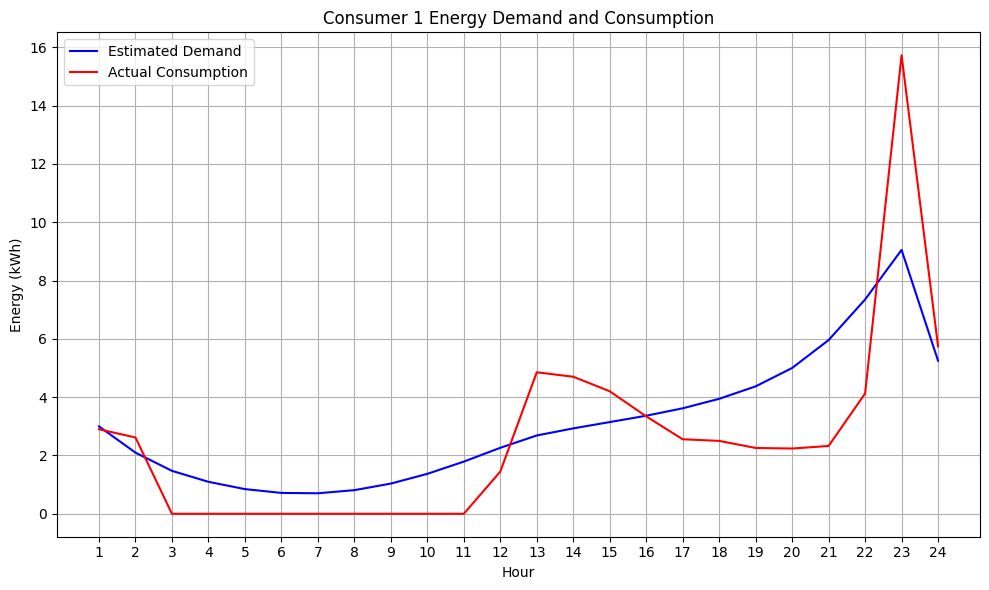

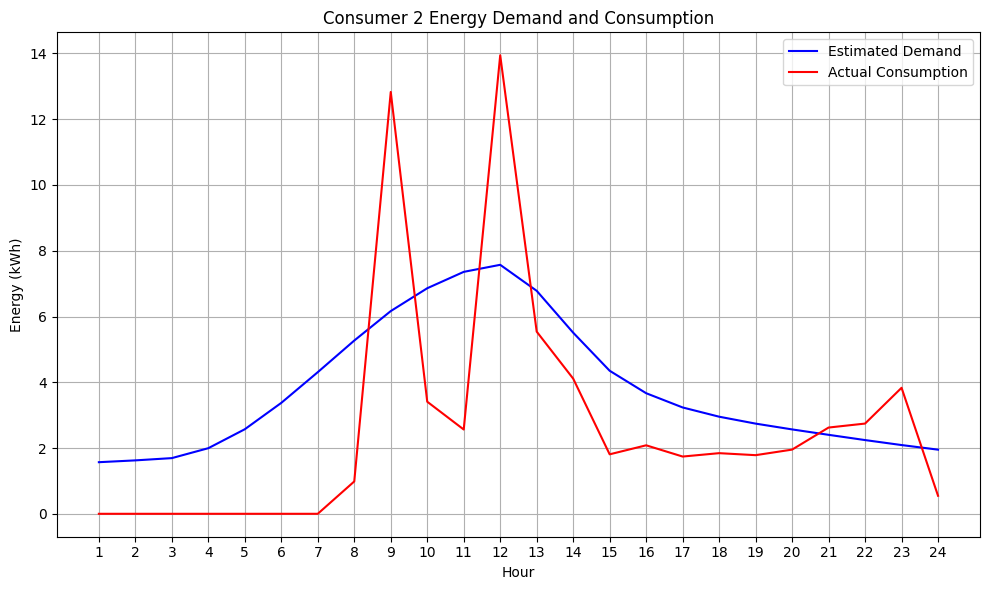

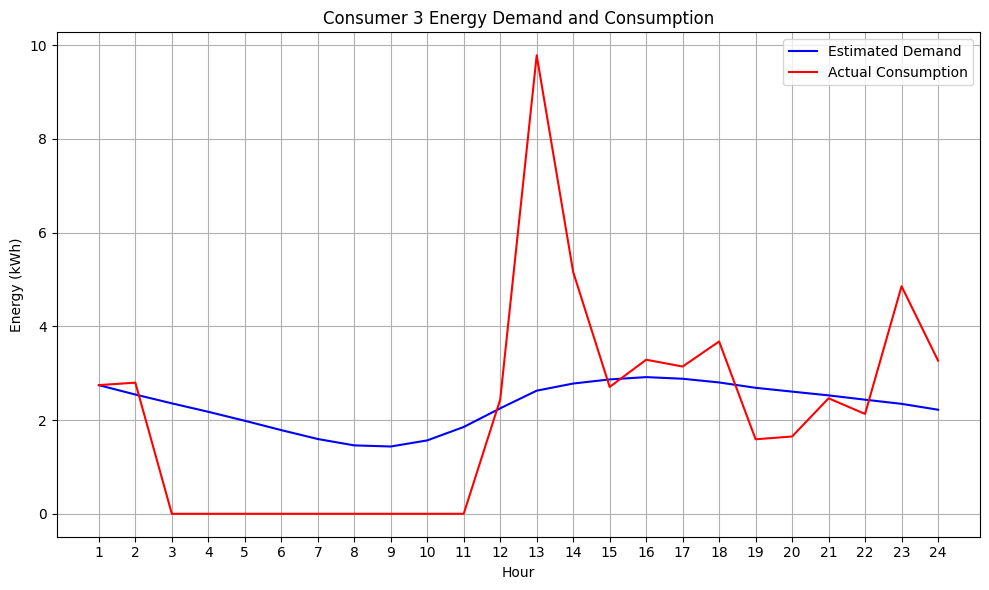

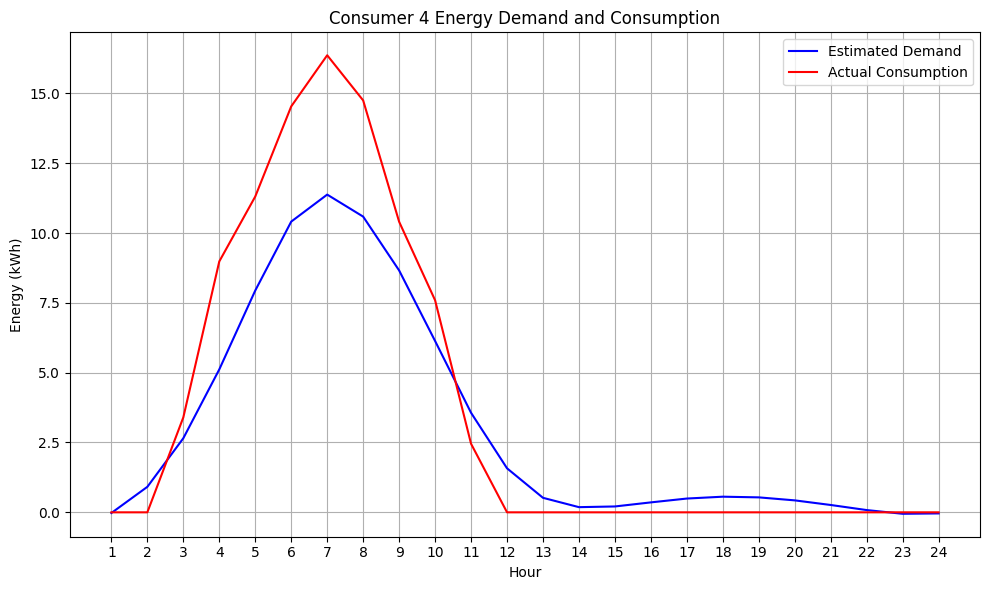

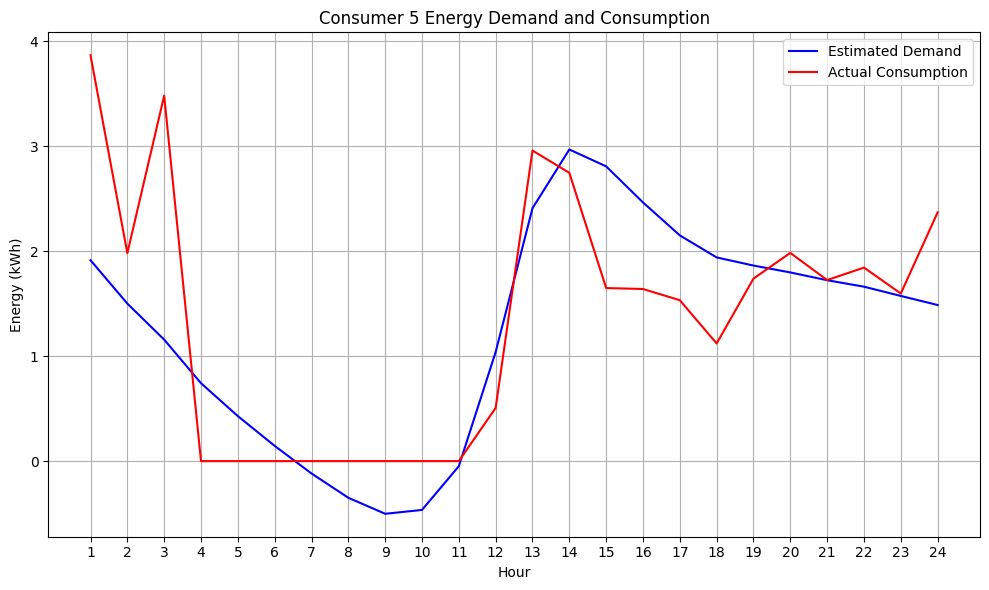

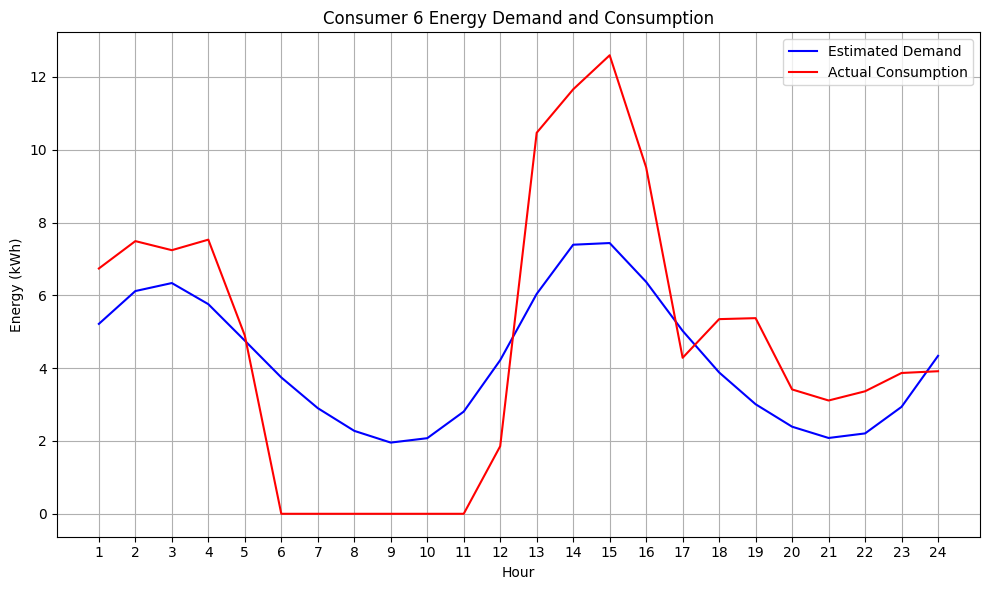

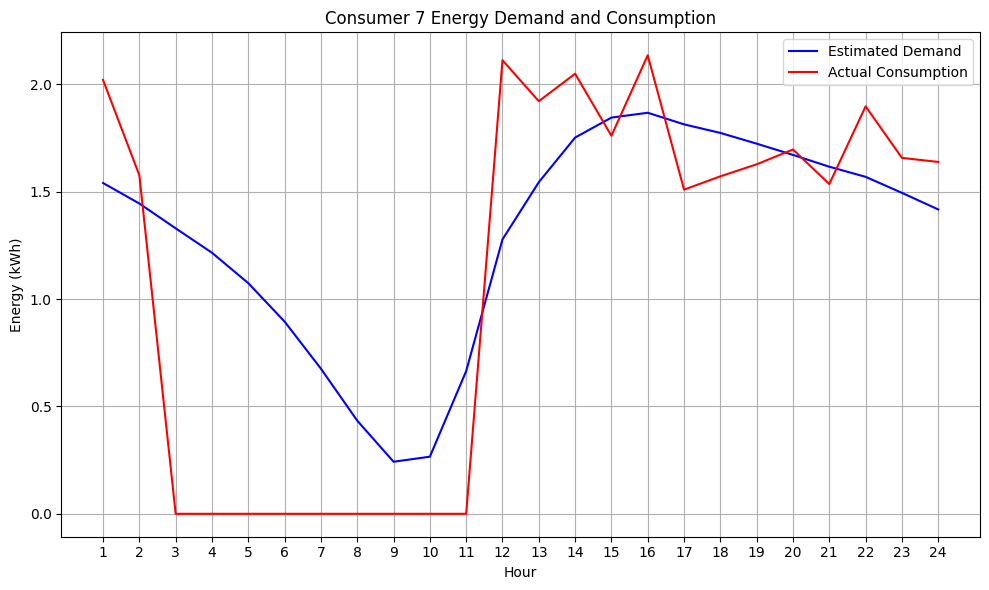

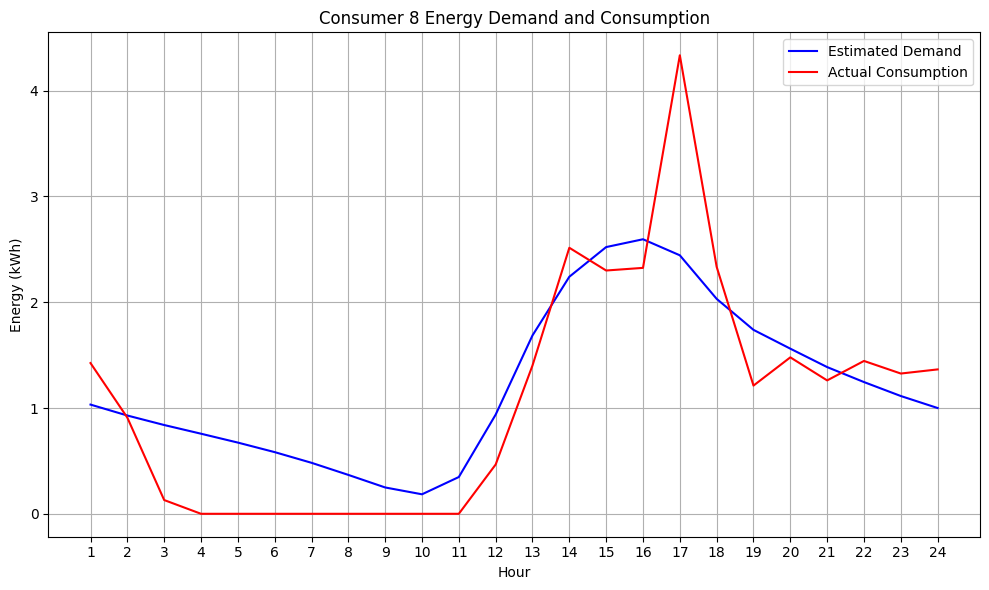

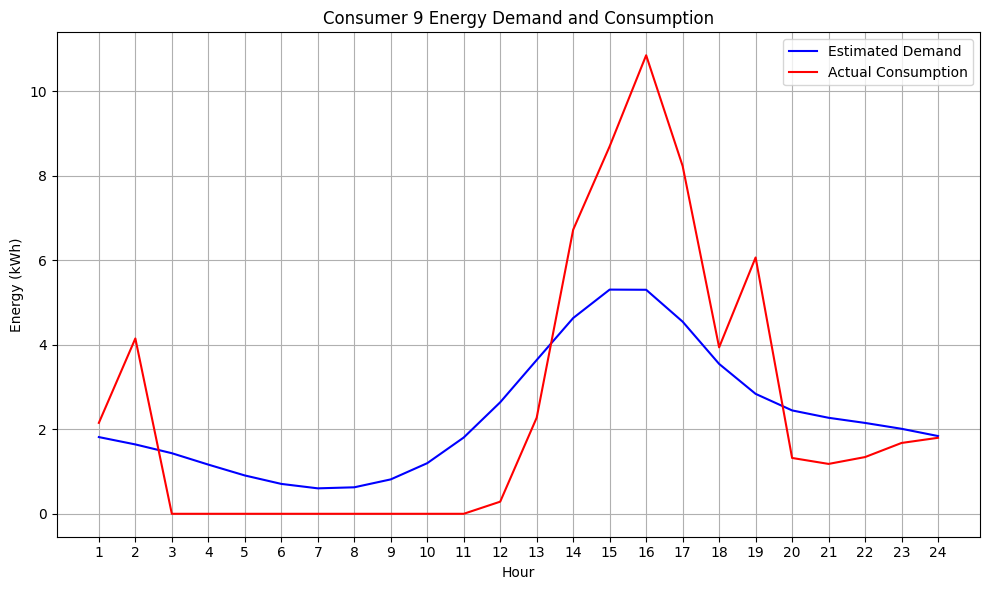

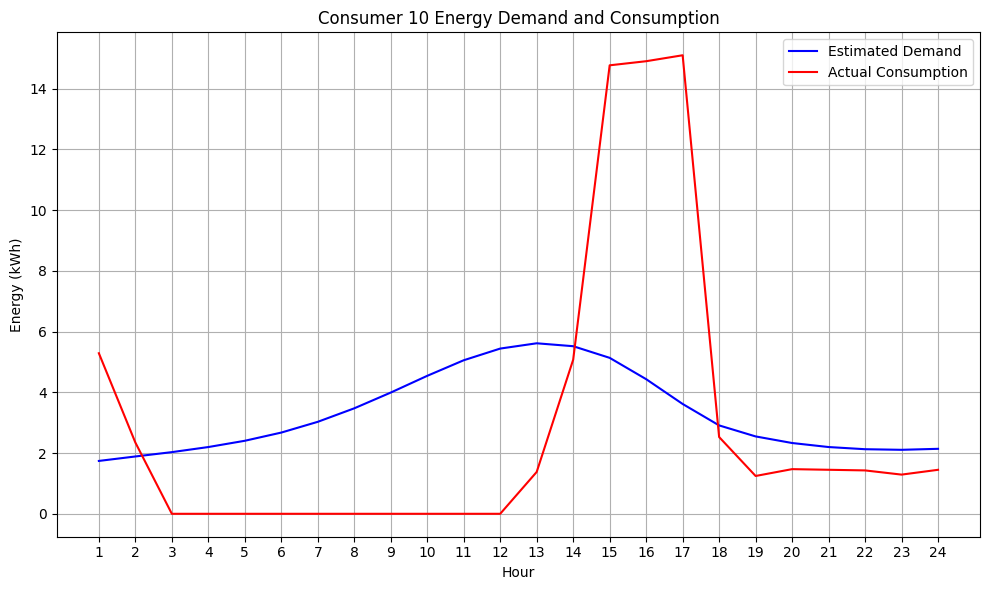

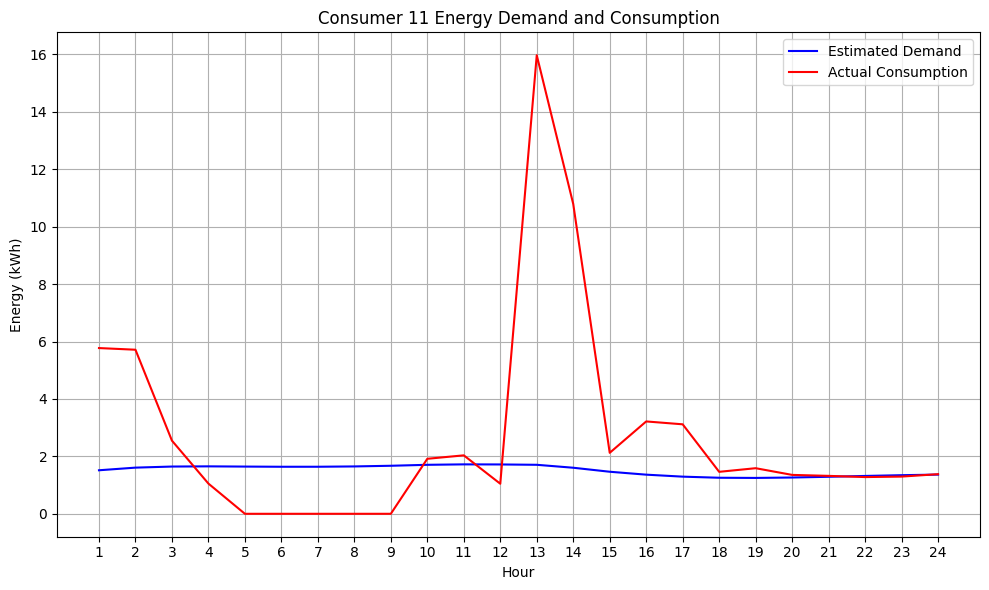

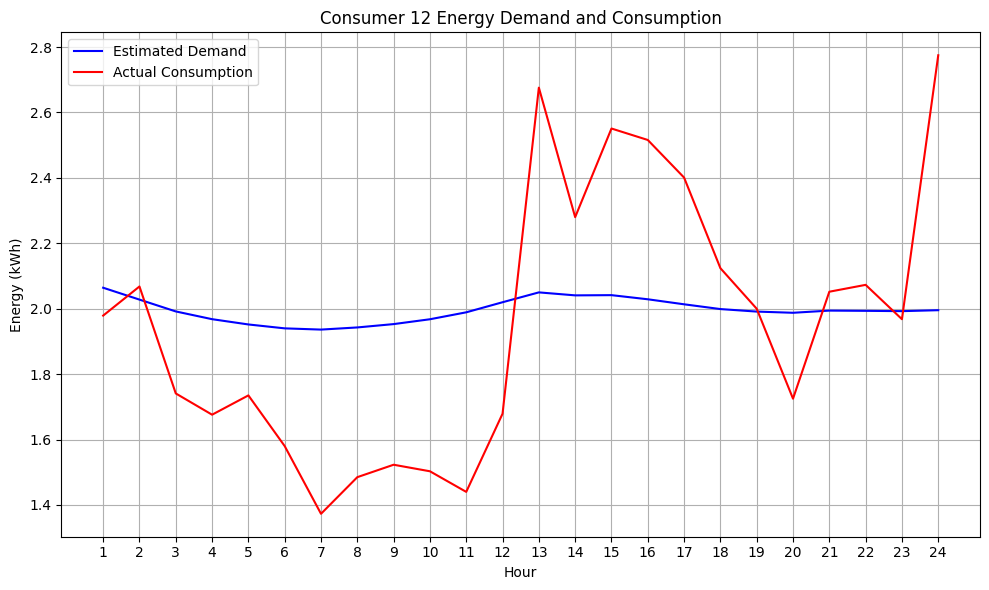

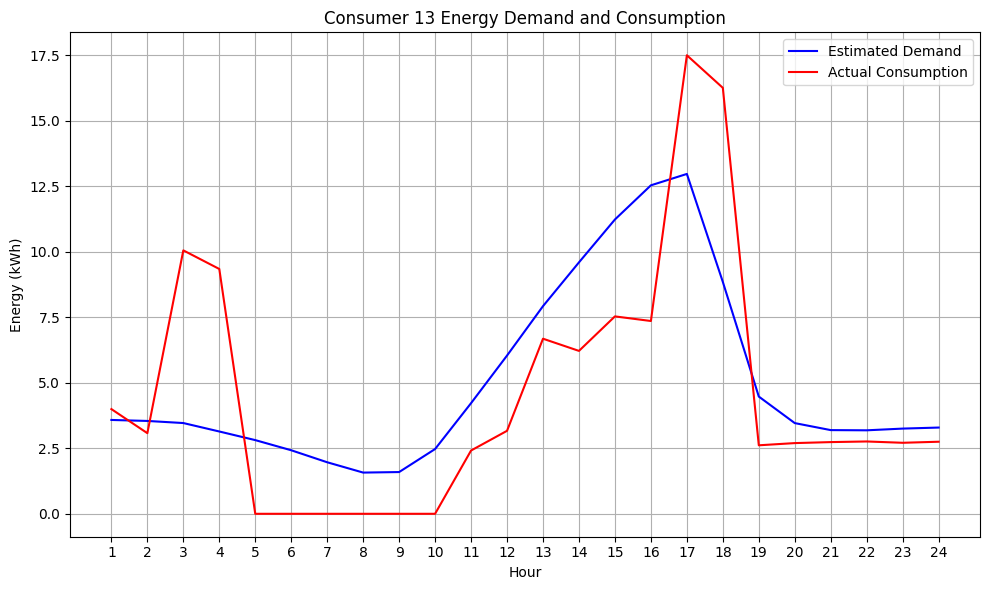

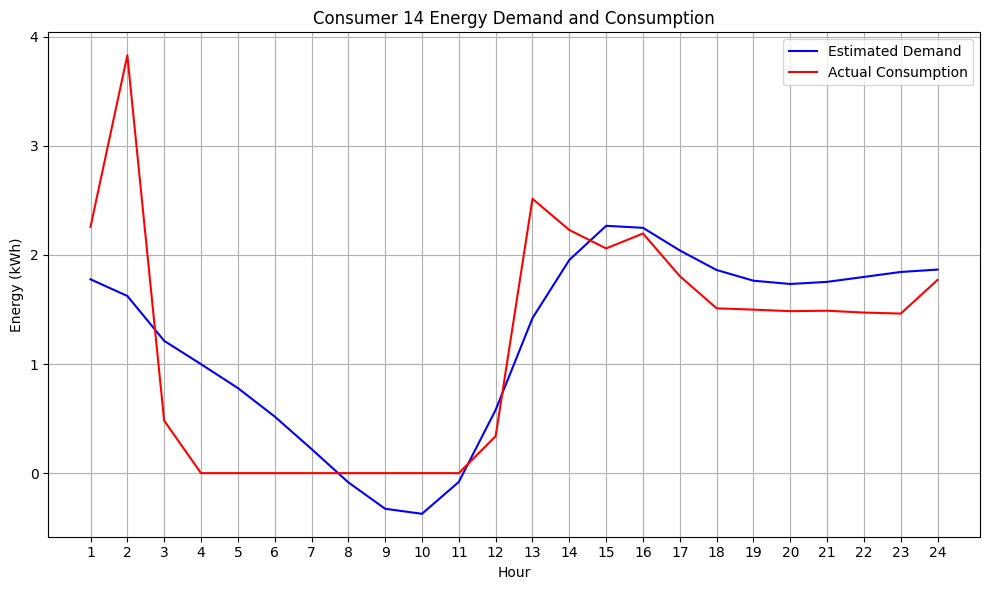

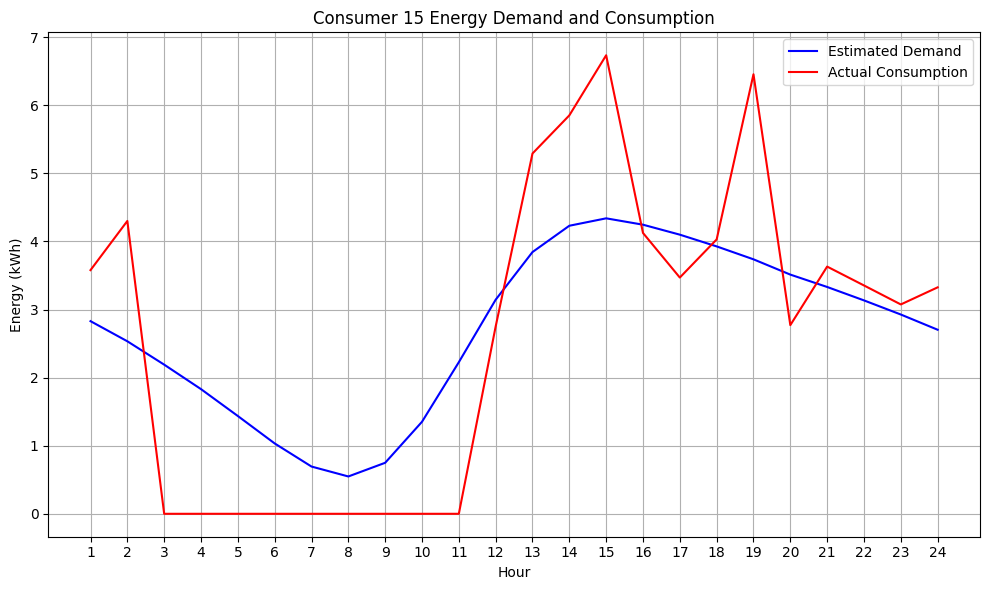

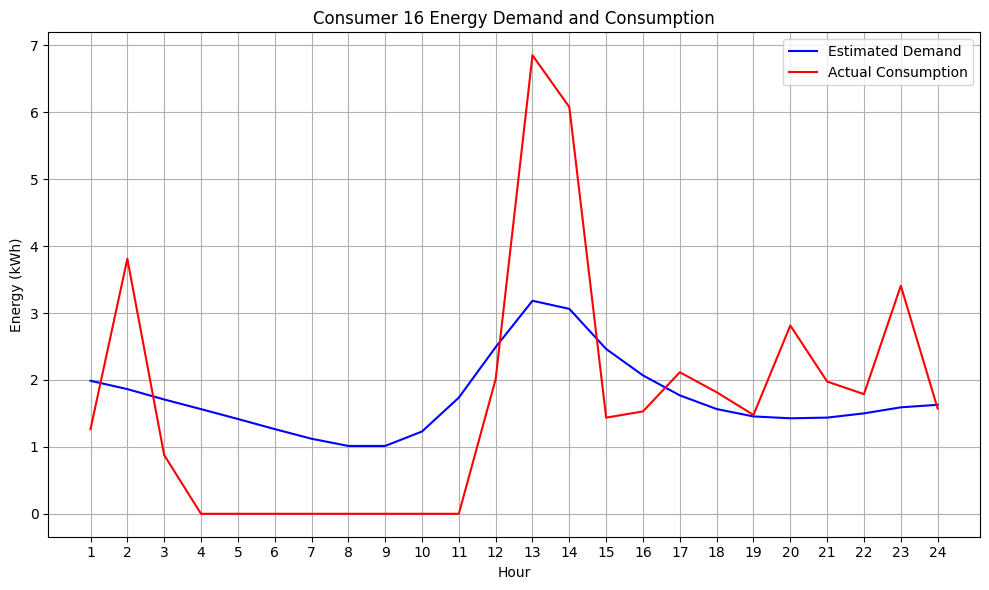

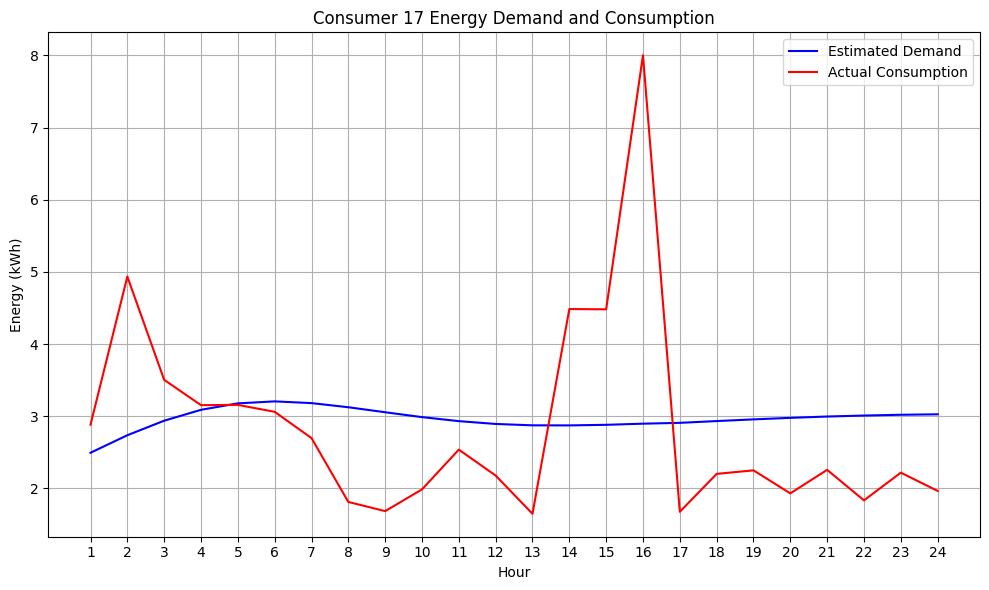

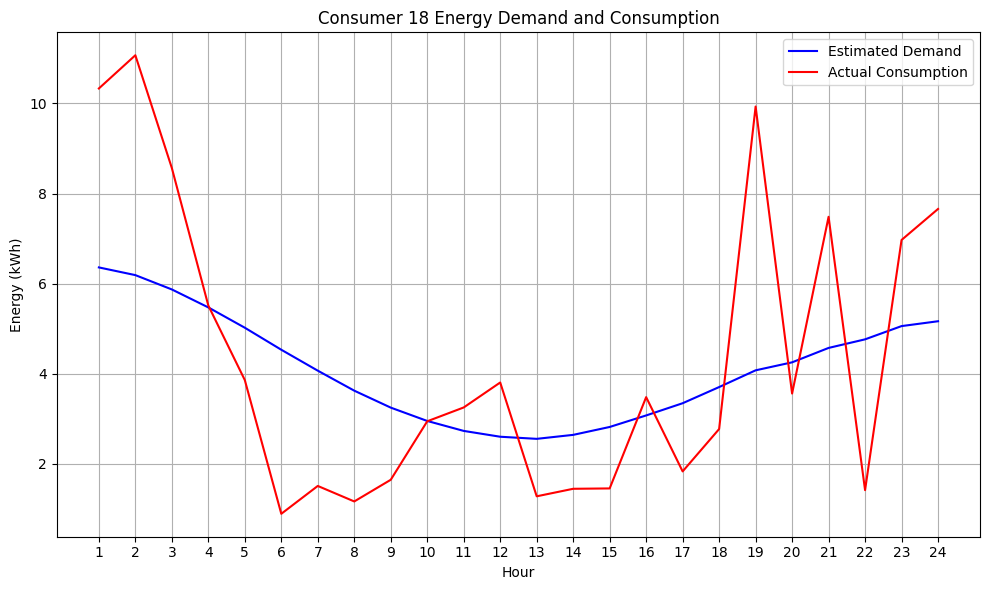

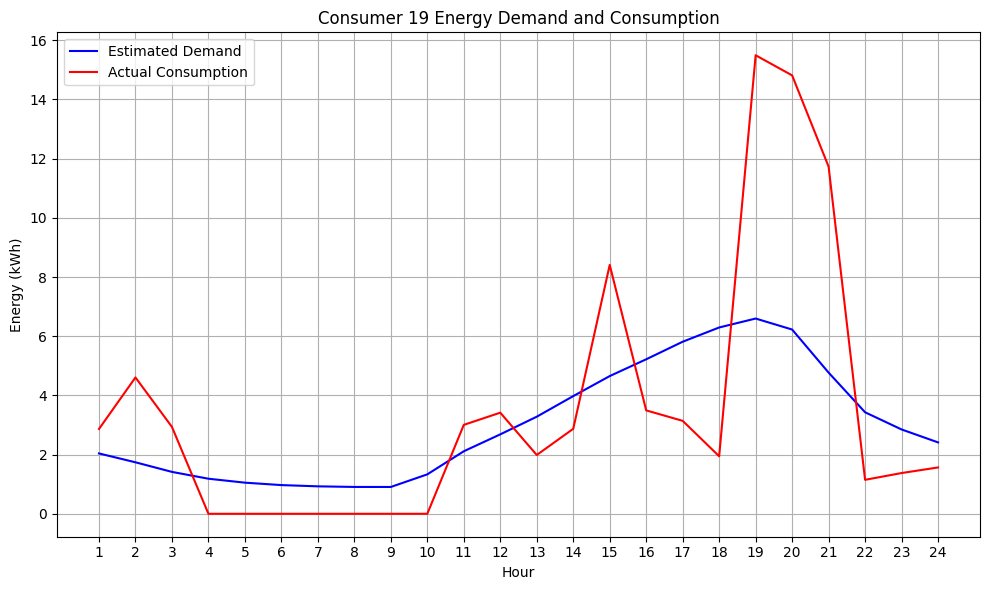

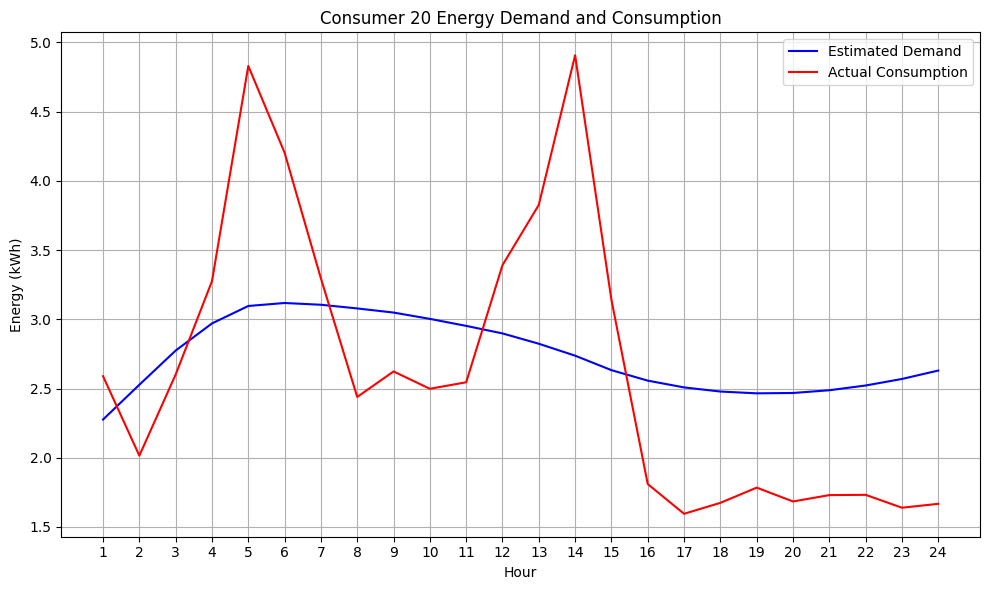

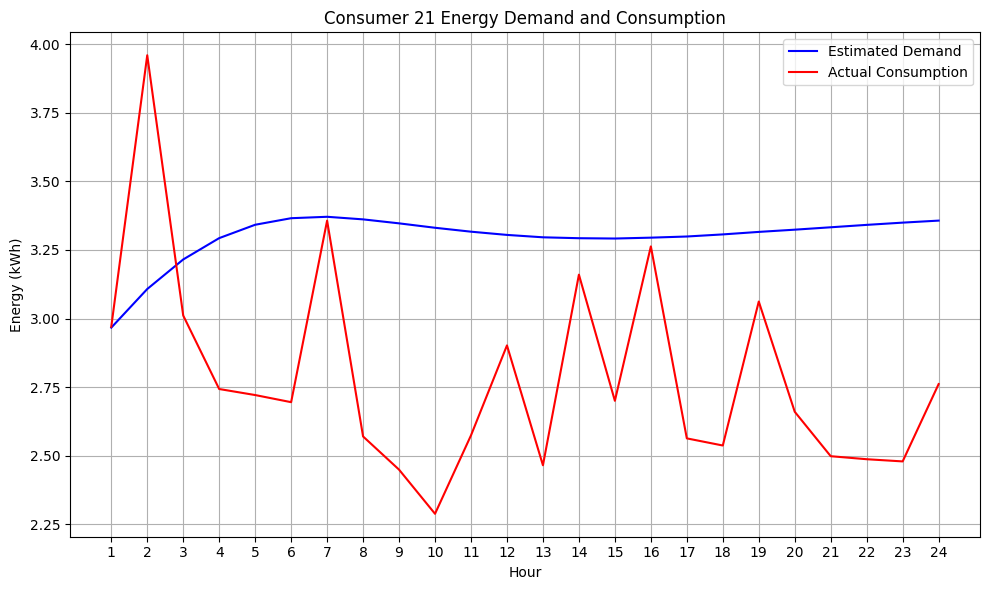

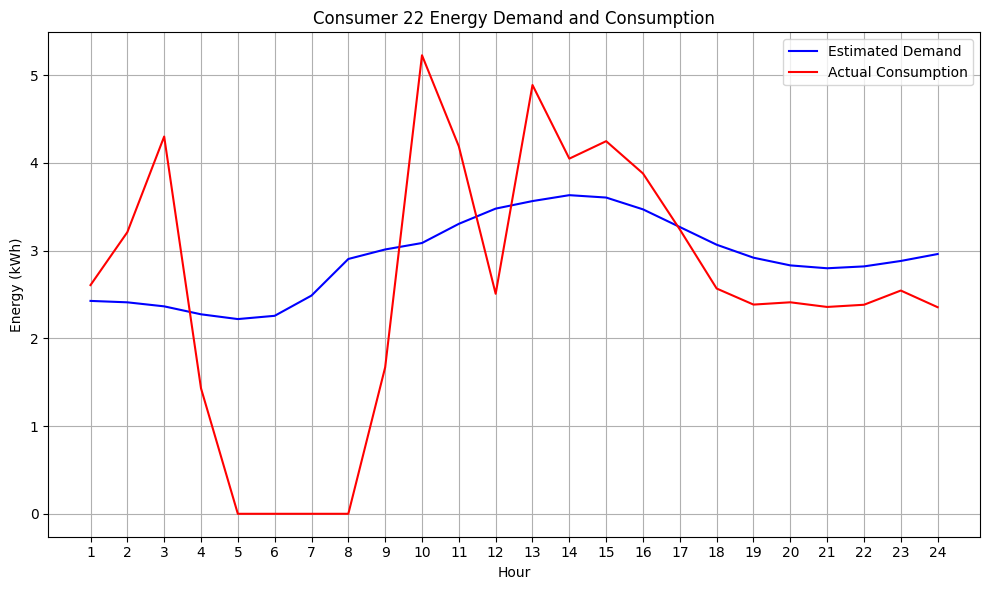

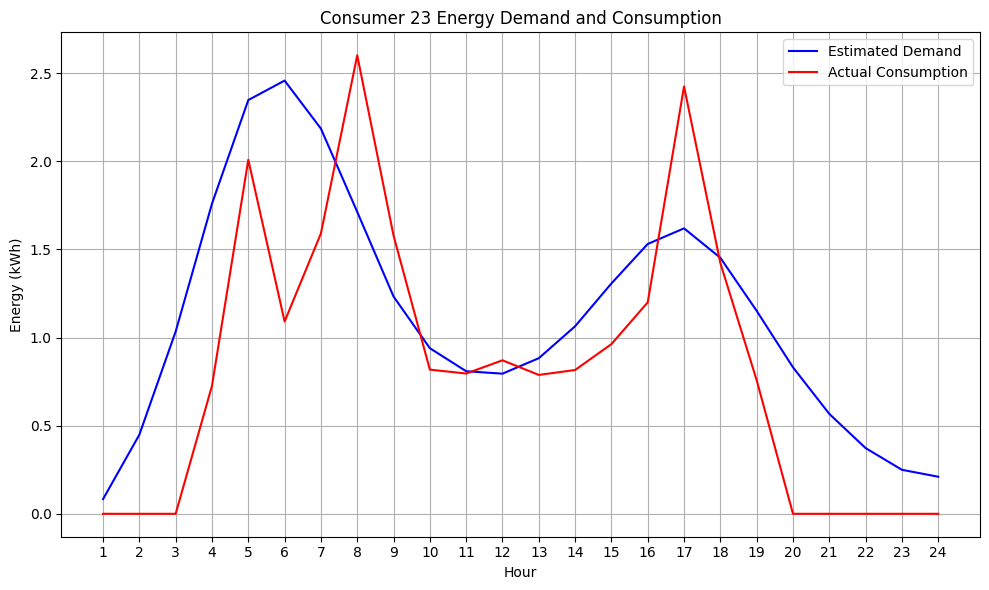

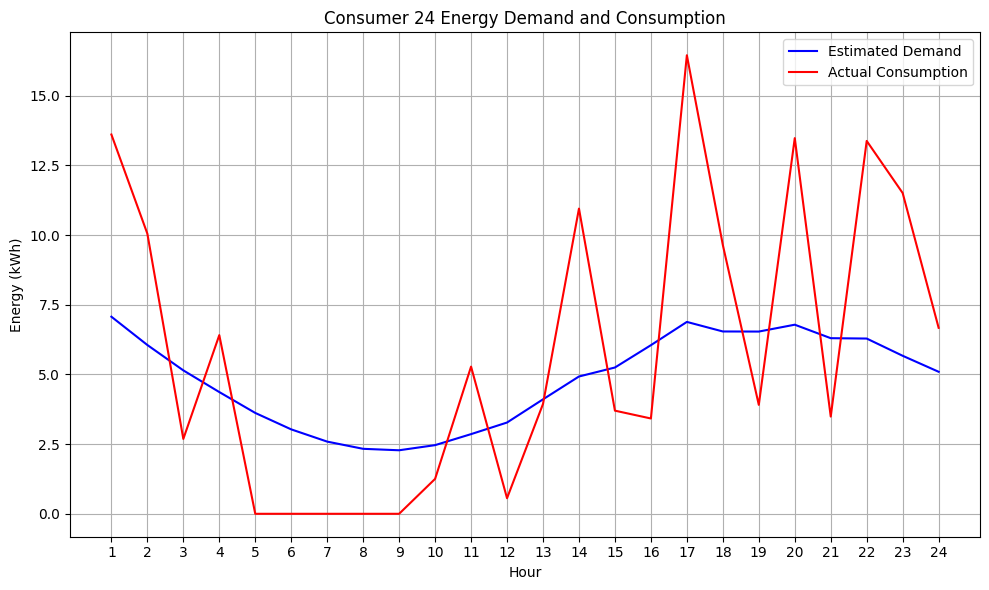

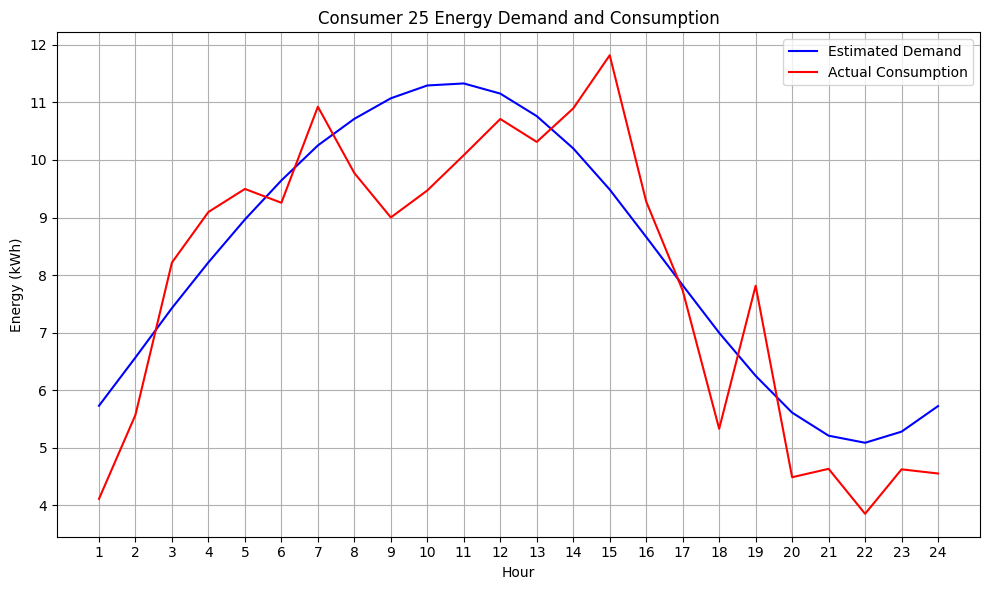

In [ ]:
import matplotlib.pyplot as plt

def plot_consumer_data(consumers):
    for i, consumer in enumerate(consumers, start=1):
        plt.figure(figsize=(10, 6))

        # Plot estimated demand
        plt.plot(consumer.demand, label="Estimated Demand", color='blue')

        # Plot actual consumption
        plt.plot(consumer.consumption, label="Actual Consumption", color='red')

        plt.title(f"Consumer {i} Energy Demand and Consumption")
        plt.xlabel("Hour")
        plt.ylabel("Energy (kWh)")
        plt.legend()
        plt.grid(True)
        plt.xticks(range(24), range(1, 25))  # Label x-axis with hours
        plt.tight_layout()
        plt.show()

plot_consumer_data(consumers)


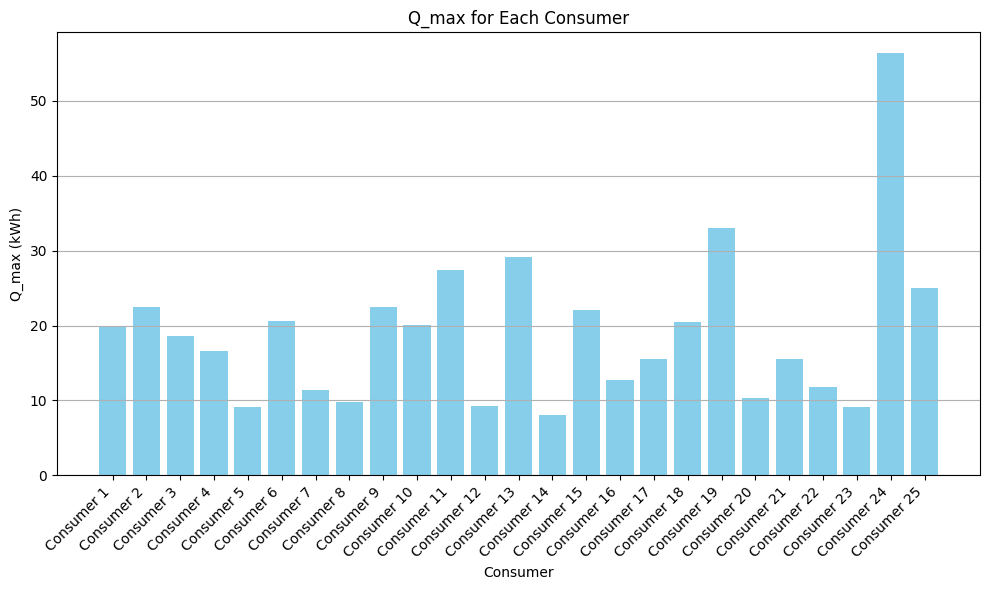

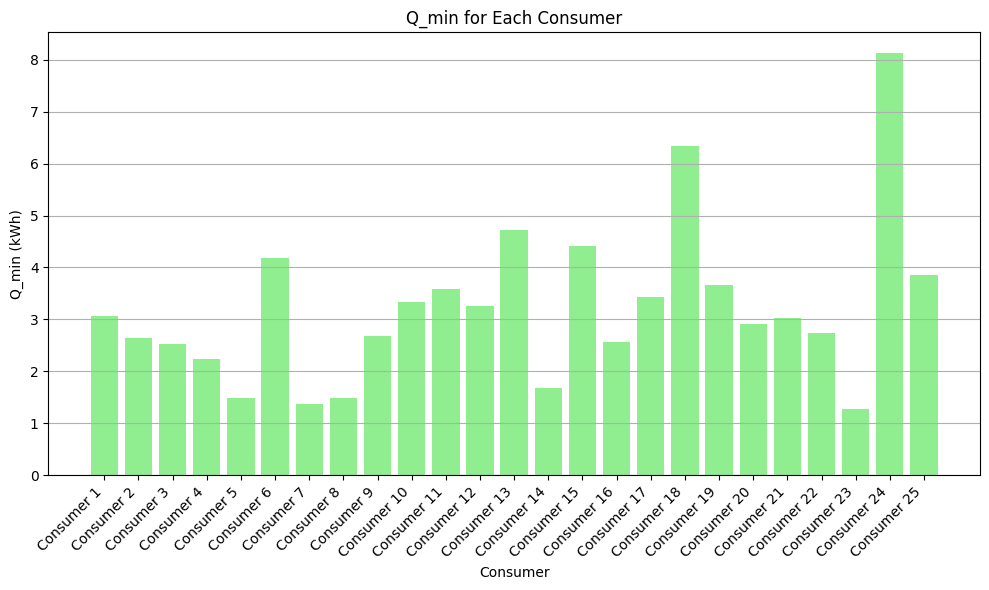

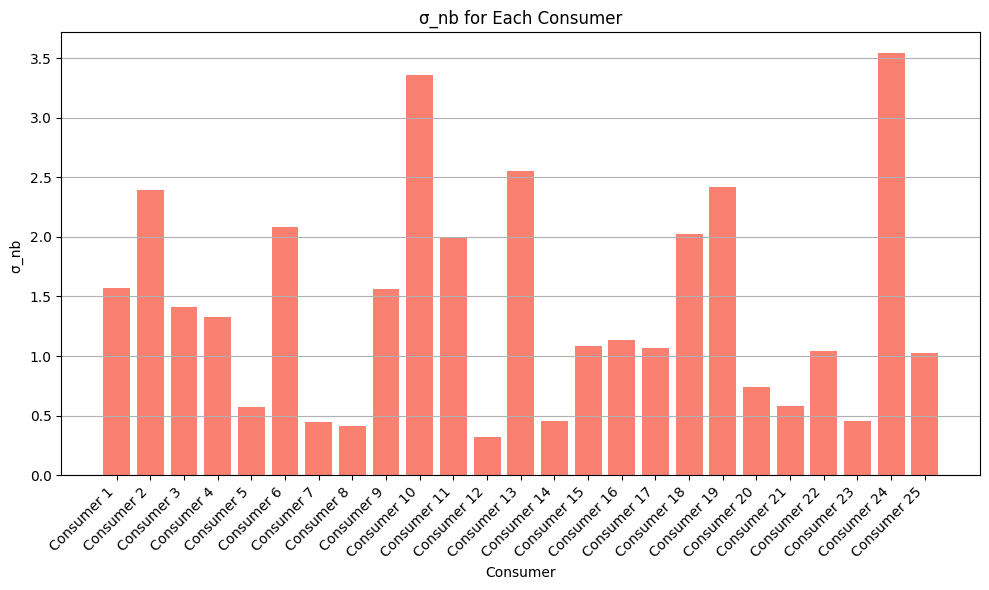

In [ ]:
def plot_consumer_stats(consumers):
    num_consumers = len(consumers)
    labels = [f"Consumer {i}" for i in range(1, num_consumers + 1)]
    q_max_values = [consumer.Q_max for consumer in consumers]
    q_min_values = [consumer.Q_min for consumer in consumers]
    sigma_nb_values = [consumer.sigma_n_b for consumer in consumers]

    # Plot Q_max
    plt.figure(figsize=(10, 6))
    plt.bar(labels, q_max_values, color='skyblue')
    plt.title("Q_max for Each Consumer")
    plt.xlabel("Consumer")
    plt.ylabel("Q_max (kWh)")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    # Plot Q_min
    plt.figure(figsize=(10, 6))
    plt.bar(labels, q_min_values, color='lightgreen')
    plt.title("Q_min for Each Consumer")
    plt.xlabel("Consumer")
    plt.ylabel("Q_min (kWh)")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    # Plot sigma_nb
    plt.figure(figsize=(10, 6))
    plt.bar(labels, sigma_nb_values, color='salmon')
    plt.title("σ_nb for Each Consumer")
    plt.xlabel("Consumer")
    plt.ylabel("σ_nb ")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

plot_consumer_stats(consumers)


In [ ]:
print("σ")

σ


In [ ]:
class Supplier:
    def __init__(self, subscription_price, penalty_cost):
        self.p_max = subscription_price
        self.penalty_cost = penalty_cost
        self.cost_ratio = 0.8
        self.Q_b_max = self.p_max*40
        self.Q_b_min = self.p_max*20
        self.Qr_b_max = self.p_max*40
        self.Qr_b_min = self.p_max*30


    def calculate_building_penalty(self, building):
        return self.penalty_cost

    def recalculate_parameters(self,i):
       print(f"old parameters: p_max{self.p_max}, Q_min_b_s: {self.Q_b_min}, Qr_min: {self.Qr_b_min}")
       self.p_max = self.p_max * ((self.Q_b_max - self.Q_b_min + 1) / (self.Q_b_max - self.Q_b_min + i + 1))
       self.Q_b_min = self.Q_b_min * ((self.Q_b_max - self.Q_b_min + 1) / (self.Q_b_max - self.Q_b_min + i + 1))
       self.Qr_b_min = self.Qr_b_min * ((self.Qr_b_max - self.Qr_b_min + 1) / (self.Qr_b_max - self.Qr_b_min + i + 1))
       print(f"new parameters: p_max{self.p_max}, Q_min_b_s: {self.Q_b_min}, Qr_min: {self.Qr_b_min}")



    def monthly_contract_receive_offer(self, Q_min, Qr_min, p_max):
        self.Q_b_min = Q_min
        self.Qr_b_min = Qr_min
        self.p_max = p_max

    def monthly_contract_utility_supplier_parameter(self):
        print(f"supplier utility wrt s: {self.Q_b_min + self.p_max + self.Qr_b_min}")
        return self.Q_b_min + self.p_max + self.Qr_b_min

    def monthly_contract_utility_building_parameter(self, p_max, Q_b_min, Qr_b_min):
        print(f"supplier utility wrt b: {Q_b_min + p_max + Qr_b_min}")
        return Q_b_min + p_max + Qr_b_min


In [ ]:
num_suppliers = len(latest_price)
# subscription_range = (20, 50)  # Range for minimum renewable energy preference
# penalty_range = (0.5, 1)  # Range for maximum renewable energy preference

# Generate random values for each consumer attribute within the specified ranges'
suppliers = [
    Supplier(
        latest_price[i],
        np.random.normal(latest_price[i], 1),
    )
    for i in range(num_suppliers)
]


In [ ]:
class BuildingAgent:
    def __init__(self, consumers,):
        self.consumers = consumers
        self.Q_MAX = sum(c.Q_max for c in consumers)
        self.Q_MIN = sum(c.Q_min for c in consumers)
        self.Q_max_b_s = [0]*5
        self.Q_min_b_s = [0]*5
        self.renewable_quotient = 0.1
        self.Qr_max_b_s = [0]*5
        self.Qr_min_b_s = [0]*5
        self.p_max = [2]*5
        self.sigma_b = sum(c.sigma_n_b for c in self.consumers)
        self.penalty = 0
        # Initialize an array to store the total demand for each hour
        self.hourly_demand = [0] * 24
        self.calculate_hourly_demand()

    # def calculate_maxmin(self):
    #     i = -1
    #     for x in self.consumers:


    def calculate_hourly_demand(self):
        # Iterate over each consumer
        for consumer in self.consumers:
            # Iterate over each hour and add the demand to the corresponding hour
            for hour, demand in enumerate(consumer.demand):
                self.hourly_demand[hour] += demand

    def calculate_penalty(self, suppliers):
        if self.hourly_demand[14] > self.Q_MAX:
            print(self.Q_MAX)
            self.penalty = sum(s.calculate_building_penalty(self) for s in suppliers)
            # Distribute penalty among over-consuming consumers
            over_consumers = [c for c in self.consumers if c.Q_max < c.demand[14]]
            # num_over_consumers = len(over_consumers)
            total_over_consumption = sum(c.Q_max - c.demand[14] for c in over_consumers)
            for consumer in over_consumers:
                consumer.penalty_coefficient = (consumer.Q_max - consumer.demand[14]) / total_over_consumption
        else:
            self.penalty = 0

    def calculate_bounds(self, suppliers):
        qr1 = self.Q_MAX*self.renewable_quotient
        qr2 = self.Q_MIN*self.renewable_quotient
        self.Q_MAX *= (1-self.renewable_quotient)
        self.Q_MIN *= (1-self.renewable_quotient)
        avg_price = sum(s.p_max for s in suppliers)
        total_weight = sum(avg_price/s.p_max for s in suppliers)
        for s in suppliers:
            self.Q_max_b_s.append(self.Q_MAX * (avg_price/(s.p_max*total_weight)))
            self.Q_min_b_s.append(self.Q_MIN * (avg_price/(s.p_max*total_weight)))
            self.Qr_max_b_s.append(qr1 * (avg_price/(s.p_max*total_weight)))
            self.Qr_min_b_s.append(qr2 * (avg_price/(s.p_max*total_weight)))


    def recalculate_parameters(self, i):
        print(f"old parameters: p_max{self.p_max[i]}, Q_min_b_s: {self.Q_min_b_s[i]}, Qr_min: {self.Qr_min_b_s[i]}")
        self.p_max[i] = self.p_max[i] + self.sigma_b
        self.Q_min_b_s[i] = (self.Q_min_b_s[i] + 1) * (self.Q_max_b_s[i] / (self.sigma_b +  self.penalty *self. Q_max_b_s[i]))
        self.Qr_min_b_s[i] = (self.Qr_min_b_s[i] + 1) *(self.Qr_max_b_s[i] /( self.sigma_b + self.penalty * self.Qr_max_b_s[i]))
        print(f"new parameters: p_max{self.p_max[i]}, Q_min_b_s: {self.Q_min_b_s[i]}, Qr_min: {self.Qr_min_b_s[i]}")



    def monthly_contract_receive_counteroffer(self, i,p_max, Q_min, Qr_min):
        self.Q_min_b_s[i] = Q_min
        self.Qr_min_b_s[i] = Qr_min
        self.p_max[i] = p_max

    def monthly_contract_utility_building_parameter(self,i):
        print(f"buidling utitlity wrt b: {(self.Q_max_b_s[i] - self.Q_min_b_s[i]) + (self.Qr_max_b_s[i] - self.Qr_min_b_s[i]) - self.p_max[i]}")
        return (self.Q_max_b_s[i] - self.Q_min_b_s[i]) + (self.Qr_max_b_s[i] - self.Qr_min_b_s[i]) - self.p_max[i]

    def monthly_contract_utility_supplier_parameter(self,p_max, Q_max, Q_min,Qr_max, Qr_min):
        print(f"buidling utitlity wrt s: {(Q_max - Q_min) + (Qr_max - Qr_min) - p_max}")
        return (Q_max - Q_min) + (Qr_max - Qr_min) - p_max

    def quantity_received(self, suppliers):
        total = 0.0
        for x in suppliers:
            total += x.Q_b_max
        return total

building_agent = BuildingAgent(consumers)

In [ ]:
building_agent.calculate_penalty(suppliers)
# building_agent.assign_penalty_coefficients()

# Print penalties for each consumer
# for idx, consumer in enumerate(consumers, start=1):
    # print("Consumer", idx, "Penalty Coefficient:", consumer.penalty_coefficient)

In [ ]:
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 38.8 MB/s eta 0:00:00


In [ ]:
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, LpStatus

# Define constants

H = 24 * 30  # Number of time slots over a month
Q_MAX_b = building_agent.Q_MAX  # Maximum energy that can be requested by building b
Q_MIN_b = building_agent.Q_MIN # Minimum energy that can be requested by building b
Qr_MAX_b = 500  # Maximum renewable energy that can be requested by building b
Qr_MIN_b = 2.8  # Minimum renewable energy that can be requested by building b
sigma_b = building_agent.sigma_b  # Standard deviation of consumption forecasting error



# Define LP problem
prob = LpProblem("ElectricityNegotiation", LpMinimize)

# Define decision variables
Q_max = LpVariable.dicts("Q_max", suppliers, lowBound=Q_MIN_b, upBound=Q_MAX_b)
Q_min = LpVariable.dicts("Q_min", suppliers, lowBound=0, upBound=Q_MAX_b)
Qr_max = LpVariable.dicts("Qr_max", suppliers, lowBound=Qr_MIN_b, upBound=Qr_MAX_b)
Qr_min = LpVariable.dicts("Qr_min", suppliers, lowBound=0, upBound=Qr_MAX_b)

# Define objective function
prob += lpSum(s.p_max * Q_max[s] + s.calculate_building_penalty(building_agent) * sigma_b * H * (Q_max[s] - Q_min[s] + Qr_max[s] - Qr_min[s]) for s in suppliers)

# Define constraints
prob += lpSum(Q_max[s] for s in suppliers) == Q_MAX_b
prob += lpSum(Q_min[s] for s in suppliers) == Q_MIN_b
prob += lpSum(Qr_max[s] for s in suppliers) == Qr_MAX_b
prob += lpSum(Qr_min[s] for s in suppliers) == Qr_MIN_b

for s in suppliers:
    prob += Q_max[s] >= Q_min[s]
    prob += Qr_max[s] >= Qr_min[s]
    # Additional constraints for non-negativity
    prob += Q_max[s] >= 0
    prob += Q_min[s] >= 0
    prob += Qr_max[s] >= 0
    prob += Qr_min[s] >= 0

# Solve the LP problem
prob.solve()
i=0
# Print the results
for s in suppliers:
    print("Energy from supplier", i, ":", Q_max[s].varValue," to ",Q_min[s].varValue)
    print("Renewable energy from supplier", i, ":", Qr_max[s].varValue," to ",Qr_min[s].varValue)
    building_agent.Q_max_b_s[i] = Q_max[s].varValue
    building_agent.Q_min_b_s[i] = Q_min[s].varValue
    building_agent.Qr_max_b_s[i]=Qr_max[s].varValue
    building_agent.Qr_min_b_s[i]=Qr_min[s].varValue
    print(building_agent.Q_max_b_s[i],building_agent.Q_min_b_s[i],building_agent.Qr_max_b_s[i],building_agent.Qr_min_b_s[i])
    i+=1
    print(i)



print("Status:", LpStatus[prob.status])
print(len(building_agent.Q_max_b_s))

Energy from supplier 0 : 80.643424  to  80.643424
Renewable energy from supplier 0 : 2.8  to  2.8
80.643424 80.643424 2.8 2.8
1
Energy from supplier 1 : 80.643424  to  0.0
Renewable energy from supplier 1 : 2.8  to  0.0
80.643424 0.0 2.8 0.0
2
Energy from supplier 2 : 154.1663  to  0.0
Renewable energy from supplier 2 : 488.8  to  0.0
154.1663 0.0 488.8 0.0
3
Energy from supplier 3 : 80.643424  to  0.0
Renewable energy from supplier 3 : 2.8  to  0.0
80.643424 0.0 2.8 0.0
4
Energy from supplier 4 : 80.643424  to  0.0
Renewable energy from supplier 4 : 2.8  to  0.0
80.643424 0.0 2.8 0.0
5
Status: Optimal
5


In [ ]:
def print_building_agent_data(building_agent):
    print("Building Agent Data:")
    print(f"Total Q_MAX: {building_agent.Q_MAX}")
    print(f"Total Q_MIN: {building_agent.Q_MIN}")
    print(f"Total Sigma_b: {building_agent.sigma_b}")
    for i in range(len(building_agent.Q_max_b_s)):
        print(f"Q_max_b_s {i}: {building_agent.Q_max_b_s[i]}")
        print(f"Q_min_b_s {i}: {building_agent.Q_min_b_s[i]}")
        print(f"Qr_max_b_s {i}: {building_agent.Qr_max_b_s[i]}")
        print(f"Qr_min_b_s {i}: {building_agent.Qr_min_b_s[i]}")
    print("Hourly Demand:")
    for hour, demand in enumerate(building_agent.hourly_demand):
        print(f"Hour {hour}: {demand}")
    print(f"Penalty: {building_agent.penalty}")
print_building_agent_data(building_agent)

Building Agent Data:
Total Q_MAX: 476.74
Total Q_MIN: 80.64342385057472
Total Sigma_b: 35.574407440821325
Q_max_b_s 0: 80.643424
Q_min_b_s 0: 80.643424
Qr_max_b_s 0: 2.8
Qr_min_b_s 0: 2.8
Q_max_b_s 1: 80.643424
Q_min_b_s 1: 0.0
Qr_max_b_s 1: 2.8
Qr_min_b_s 1: 0.0
Q_max_b_s 2: 154.1663
Q_min_b_s 2: 0.0
Qr_max_b_s 2: 488.8
Qr_min_b_s 2: 0.0
Q_max_b_s 3: 80.643424
Q_min_b_s 3: 0.0
Qr_max_b_s 3: 2.8
Qr_min_b_s 3: 0.0
Q_max_b_s 4: 80.643424
Q_min_b_s 4: 0.0
Qr_max_b_s 4: 2.8
Qr_min_b_s 4: 0.0
Hourly Demand:
Hour 0: 65.7547777891159
Hour 1: 65.69030612707138
Hour 2: 65.7075782418251
Hour 3: 66.01298928260803
Hour 4: 66.47535157203674
Hour 5: 66.43940085172653
Hour 6: 65.3061534166336
Hour 7: 63.36284929513931
Hour 8: 61.9079395532608
Hour 9: 63.478844583034515
Hour 10: 69.35969066619873
Hour 11: 78.29413199424744
Hour 12: 87.82536828517914
Hour 13: 93.74363660812378
Hour 14: 95.3611820936203
Hour 15: 94.58826673030853
Hour 16: 91.48978984355927
Hour 17: 82.58556890487671
Hour 18: 75.00250923

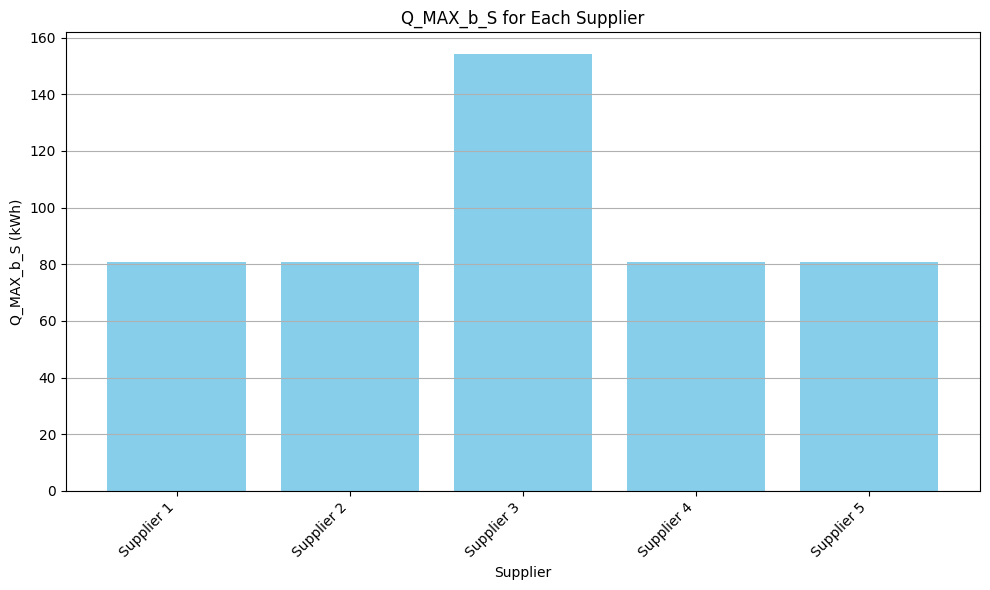

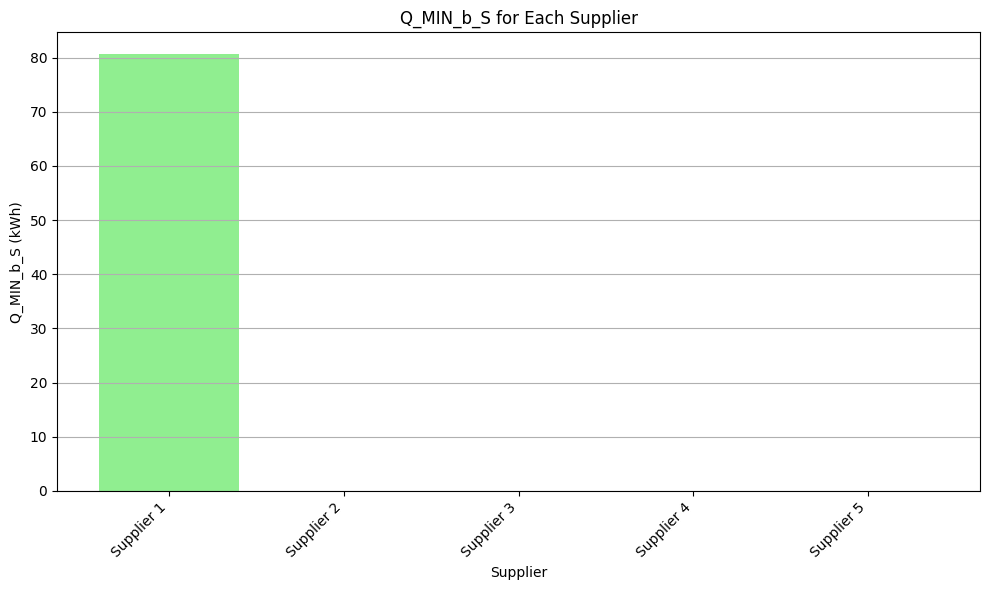

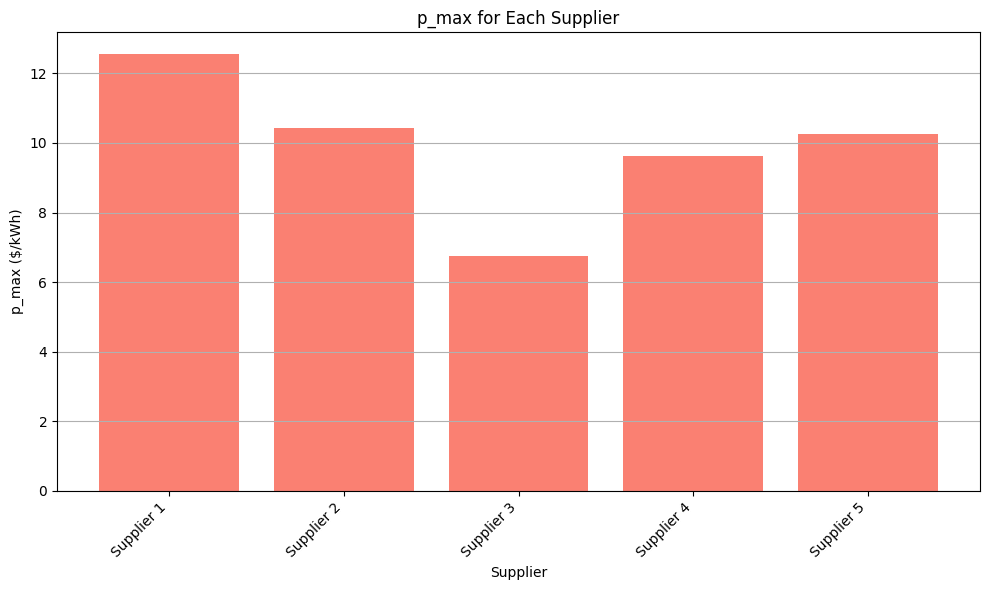

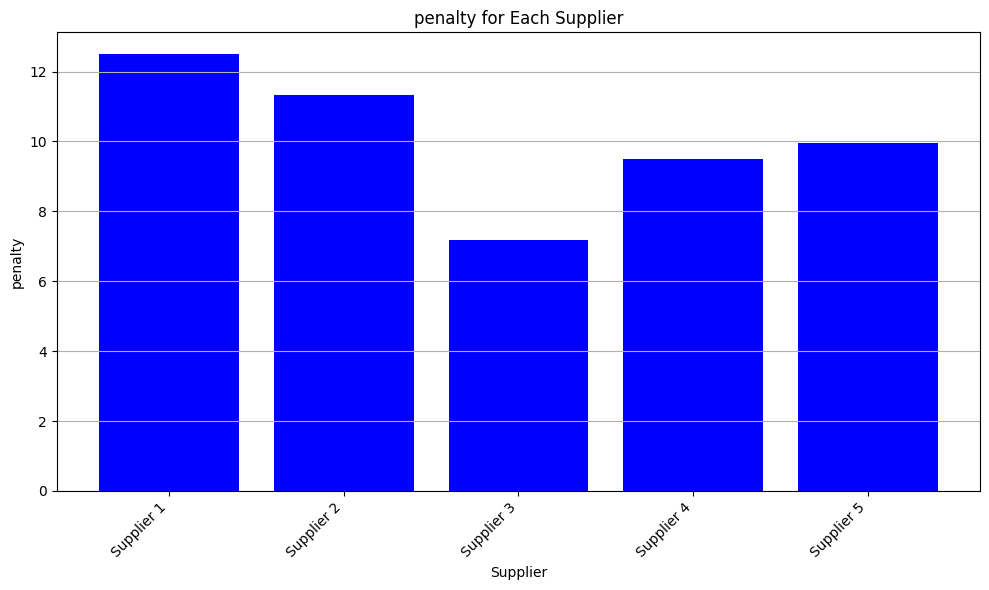

In [ ]:
def plot_supplier_parameters(building_agent):
    num_suppliers = len(building_agent.Q_max_b_s)
    labels = [f"Supplier {i}" for i in range(1, num_suppliers + 1)]
    q_max_values = building_agent.Q_max_b_s
    q_min_values = building_agent.Q_min_b_s
    p_max_values = list(supplier.p_max for supplier in suppliers)
    penalty_values = list(supplier.penalty_cost for supplier in suppliers)

    # Plot Q_MAX_b_S
    plt.figure(figsize=(10, 6))
    plt.bar(labels, q_max_values, color='skyblue')
    plt.title("Q_MAX_b_S for Each Supplier")
    plt.xlabel("Supplier")
    plt.ylabel("Q_MAX_b_S (kWh)")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    # Plot Q_MIN_b_S
    plt.figure(figsize=(10, 6))
    plt.bar(labels, q_min_values, color='lightgreen')
    plt.title("Q_MIN_b_S for Each Supplier")
    plt.xlabel("Supplier")
    plt.ylabel("Q_MIN_b_S (kWh)")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    # Plot p_max
    plt.figure(figsize=(10, 6))
    plt.bar(labels, p_max_values, color='salmon')
    plt.title("p_max for Each Supplier")
    plt.xlabel("Supplier")
    plt.ylabel("p_max ($/kWh)")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    # Plot penalty
    plt.figure(figsize=(10, 6))
    plt.bar(labels, penalty_values, color='blue')
    plt.title("penalty for Each Supplier")
    plt.xlabel("Supplier")
    plt.ylabel("penalty")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

plot_supplier_parameters(building_agent)


In [ ]:
import matplotlib.pyplot as plt

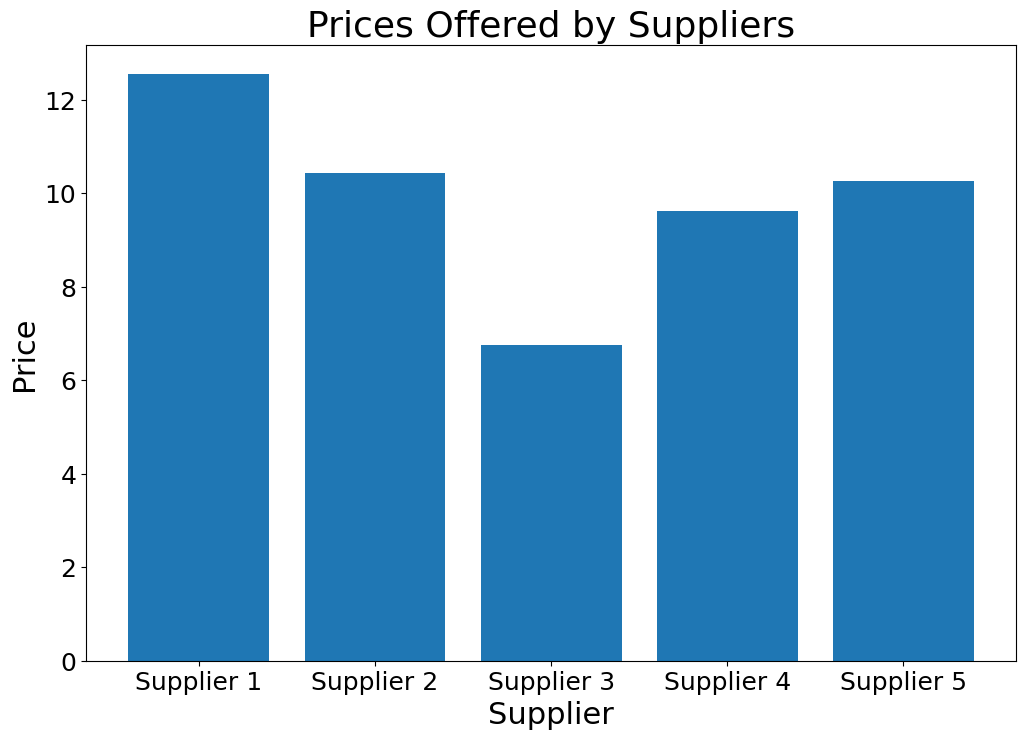

In [ ]:
plt.figure(figsize=(12, 8))  # Increasing the size of the figure
plt.bar(range(len(suppliers)), [s.p_max for s in suppliers])
plt.xlabel('Supplier', fontsize=22)  # Increasing the font size of x-label
plt.ylabel('Price', fontsize=22)  # Increasing the font size of y-label
plt.title('Prices Offered by Suppliers', fontsize=26)  # Increasing the font size of title
plt.xticks(range(len(suppliers)), [f'Supplier {i+1}' for i in range(num_suppliers)], fontsize=18)  # Increasing the font size of x-ticks and setting labels
plt.yticks(fontsize=18)  # Increasing the font size of y-ticks
plt.show()


In [ ]:
class MonthlyContractNegotiation:
    def __init__(self, building_agent, supplier_agent, sp):
        self.building_agent = building_agent
        self.supplier_agent = supplier_agent
        self.iteration = 0
        self.utility_history = []
        self.Q_min_price_history = []
        self.agreement_reached = False

        if self.supplier_agent.monthly_contract_utility_building_parameter(self.building_agent.p_max[sp],self.building_agent.Q_min_b_s[sp],self.building_agent.Qr_min_b_s[sp]) >= self.building_agent.monthly_contract_utility_building_parameter(sp):
            self.agreement_reached = True
            print("this 1 Monthly contract signed.")
        else:
            self.negotiate(sp)

    def negotiate(self,sp):

        while not self.agreement_reached:
            self.iteration += 1
            # print(self.iteration)
            # Calculate utility and record it
            building_utility_wrt_s = self.building_agent.monthly_contract_utility_supplier_parameter(self.supplier_agent.p_max,self.supplier_agent.Q_b_max,self.supplier_agent.Q_b_min,self.supplier_agent.Qr_b_max,self.supplier_agent.Qr_b_min)
            supplier_utility_wrt_s = self.supplier_agent.monthly_contract_utility_supplier_parameter()
            building_utility_wrt_b = self.building_agent.monthly_contract_utility_building_parameter(sp)
            supplier_utility_wrt_b = self.supplier_agent.monthly_contract_utility_building_parameter(self.building_agent.p_max[sp],self.building_agent.Q_min_b_s[sp],self.building_agent.Qr_min_b_s[sp])

            # Record utility for current iteration
            self.utility_history.append((self.iteration, building_utility_wrt_s, supplier_utility_wrt_s,building_utility_wrt_b,supplier_utility_wrt_b))
            self.Q_min_price_history.append((self.iteration, self.building_agent.Q_min_b_s[sp], self.supplier_agent.Q_b_min,self.building_agent.p_max[sp],self.supplier_agent.p_max))

            Zs = (supplier_utility_wrt_s - supplier_utility_wrt_b) / supplier_utility_wrt_s
            Zb = (building_utility_wrt_b - building_utility_wrt_s) / building_utility_wrt_b
            print(f"Zb: {Zb}, Zs: {Zs}")
            if Zs <= Zb and self.agreement_reached==False:
                # Supplier recalculates parameters based on concession strategy
                self.supplier_agent.recalculate_parameters(self.iteration)
                print("Supplier recalculated parameters.")

                if self.building_agent.monthly_contract_utility_supplier_parameter(self.supplier_agent.p_max,self.supplier_agent.Q_b_max,self.supplier_agent.Q_b_min,self.supplier_agent.Qr_b_max,self.supplier_agent.Qr_b_min) >= self.supplier_agent.monthly_contract_utility_supplier_parameter():
                    self.iteration+=1
                    building_utility_wrt_s = self.building_agent.monthly_contract_utility_supplier_parameter(self.supplier_agent.p_max,self.supplier_agent.Q_b_max,self.supplier_agent.Q_b_min,self.supplier_agent.Qr_b_max,self.supplier_agent.Qr_b_min)
                    supplier_utility_wrt_s = self.supplier_agent.monthly_contract_utility_supplier_parameter()
                    building_utility_wrt_b = self.building_agent.monthly_contract_utility_building_parameter(sp)
                    supplier_utility_wrt_b = self.supplier_agent.monthly_contract_utility_building_parameter(self.building_agent.p_max[sp],self.building_agent.Q_min_b_s[sp],self.building_agent.Qr_min_b_s[sp])

                    # Record utility for current iteration
                    self.utility_history.append((self.iteration, building_utility_wrt_s, supplier_utility_wrt_s,building_utility_wrt_b,supplier_utility_wrt_b))
                    self.Q_min_price_history.append((self.iteration, self.building_agent.Q_min_b_s[sp], self.supplier_agent.Q_b_min,self.building_agent.p_max[sp],self.supplier_agent.p_max))

                    # If yes, sign monthly contract
                    self.agreement_reached = True
                    self.building_agent.monthly_contract_receive_counteroffer(sp, self.supplier_agent.p_max, self.supplier_agent.Q_b_min, self.supplier_agent.Qr_b_min)
                    # print(self.building_agent.monthly_contract_utility_supplier_parameter(self.supplier_agent.p_max,self.supplier_agent.Q_b_max,self.supplier_agent.Q_b_min,self.supplier_agent.Qr_b_max,self.supplier_agent.Qr_b_min))
                    # print(self.supplier_agent.monthly_contract_utility_supplier_parameter())
                    print("this 2 Monthly contract signed.")
                    break
                else:
                    self.negotiate(sp)
            else:
                # Building recalculates parameters based on concession strategy
                self.building_agent.recalculate_parameters(sp)
                print("Building recalculated parameters.")

                # Check if supplier accepts the offer
                if self.supplier_agent.monthly_contract_utility_building_parameter(self.building_agent.p_max[sp],self.building_agent.Q_min_b_s[sp],self.building_agent.Qr_min_b_s[sp]) >= self.building_agent.monthly_contract_utility_building_parameter(sp):
                    self.iteration+=1
                    building_utility_wrt_s = self.building_agent.monthly_contract_utility_supplier_parameter(self.supplier_agent.p_max,self.supplier_agent.Q_b_max,self.supplier_agent.Q_b_min,self.supplier_agent.Qr_b_max,self.supplier_agent.Qr_b_min)
                    supplier_utility_wrt_s = self.supplier_agent.monthly_contract_utility_supplier_parameter()
                    building_utility_wrt_b = self.building_agent.monthly_contract_utility_building_parameter(sp)
                    supplier_utility_wrt_b = self.supplier_agent.monthly_contract_utility_building_parameter(self.building_agent.p_max[sp],self.building_agent.Q_min_b_s[sp],self.building_agent.Qr_min_b_s[sp])

                    # Record utility for current iteration
                    self.utility_history.append((self.iteration, building_utility_wrt_s, supplier_utility_wrt_s,building_utility_wrt_b,supplier_utility_wrt_b))
                    self.Q_min_price_history.append((self.iteration, self.building_agent.Q_min_b_s[sp], self.supplier_agent.Q_b_min,self.building_agent.p_max[sp],self.supplier_agent.p_max))

                    # If yes, sign monthly contract
                    self.agreement_reached = True
                    # print(self.supplier_agent.monthly_contract_utility_building_parameter(self.building_agent.p_max[sp],self.building_agent.Q_min_b_s[sp],self.building_agent.Qr_min_b_s[sp]))
                    # print(self.building_agent.monthly_contract_utility_building_parameter(sp))
                    self.supplier_agent.monthly_contract_receive_offer(self.building_agent.p_max[sp], self.building_agent.Q_min_b_s[sp], self.building_agent.Qr_min_b_s[sp])
                    print("this 3 Monthly contract signed.")
                    break
                else:
                    self.negotiate(sp)


In [ ]:
MonthlyContractNegotiation0 = MonthlyContractNegotiation(building_agent,suppliers[0],0)
MonthlyContractNegotiation1 = MonthlyContractNegotiation(building_agent,suppliers[1],1)
MonthlyContractNegotiation2 = MonthlyContractNegotiation(building_agent,suppliers[2],2)
MonthlyContractNegotiation3 = MonthlyContractNegotiation(building_agent,suppliers[3],3)
MonthlyContractNegotiation4 = MonthlyContractNegotiation(building_agent,suppliers[4],4)

supplier utility wrt b: 85.443424
buidling utitlity wrt b: -2.0
this 1 Monthly contract signed.
supplier utility wrt b: 2.0
buidling utitlity wrt b: 81.443424
buidling utitlity wrt s: 302.46999999999997
supplier utility wrt s: 531.93
buidling utitlity wrt b: 81.443424
supplier utility wrt b: 2.0
Zb: -2.713866450408568, Zs: 0.9962401067809674
old parameters: p_max2, Q_min_b_s: 0.0, Qr_min: 0.0
new parameters: p_max37.574407440821325, Q_min_b_s: 2.266894371583049, Qr_min: 0.07870826814635917
Building recalculated parameters.
supplier utility wrt b: 39.92001008055073
buidling utitlity wrt b: 43.52341391944926
buidling utitlity wrt s: 302.46999999999997
supplier utility wrt s: 531.93
buidling utitlity wrt b: 43.52341391944926
supplier utility wrt b: 39.92001008055073
Zb: -5.949592707957028, Zs: 0.9249525123972125
old parameters: p_max37.574407440821325, Q_min_b_s: 2.266894371583049, Qr_min: 0.07870826814635917
new parameters: p_max73.14881488164265, Q_min_b_s: 7.405704463497956, Qr_min: 0.

In [ ]:
MonthlyContractNegotiation2.utility_history



[(1, 196.04, 344.76, 640.9663, 2.0),
 (2, 196.04, 344.76, 587.31804829151, 55.64825170849005),
 (3, 196.04, 344.76, 344.16979353633394, 298.7965064636661),
 (4,
  207.59668946253132,
  333.2033105374686,
  344.16979353633394,
  298.7965064636661),
 (5,
  221.06262773824446,
  319.73737226175547,
  344.16979353633394,
  298.7965064636661),
 (6,
  235.70390567155658,
  305.09609432844337,
  344.16979353633394,
  298.7965064636661),
 (7,
  251.01202011961715,
  289.78797988038286,
  344.16979353633394,
  298.7965064636661),
 (8,
  266.6310275999884,
  274.16897240001157,
  344.16979353633394,
  298.7965064636661),
 (9,
  282.3045294906835,
  258.4954705093165,
  344.16979353633394,
  298.7965064636661)]

In [ ]:
MonthlyContractNegotiation2.Q_min_price_history

[(1, 0.0, 135.2, 2, 6.76),
 (2, 4.333629456975733, 135.2, 37.574407440821325, 6.76),
 (3, 23.11397372734352, 135.2, 73.14881488164265, 6.76),
 (4,
  23.11397372734352,
  132.2862068965517,
  73.14881488164265,
  6.614310344827586),
 (5,
  23.11397372734352,
  128.588835622186,
  73.14881488164265,
  6.4294417811093005),
 (6,
  23.11397372734352,
  124.23906826315533,
  73.14881488164265,
  6.211953413157768),
 (7,
  23.11397372734352,
  119.37206725235116,
  73.14881488164265,
  5.968603362617559),
 (8,
  23.11397372734352,
  114.1176163120096,
  73.14881488164265,
  5.705880815600481),
 (9,
  23.11397372734352,
  108.59409402170026,
  73.14881488164265,
  5.429704701085013)]

In [ ]:

for supplier in suppliers:
  print(supplier.p_max)
  print(supplier.Q_b_min)
  print(supplier.Qr_b_min)

12.55
251.0
376.5
0.08490325962095835
73.14881488164265
7.405704463497956
5.429704701085013
108.59409402170026
144.4716717865312
0.08490325962095835
73.14881488164265
7.405704463497956
0.08490325962095835
73.14881488164265
7.405704463497956


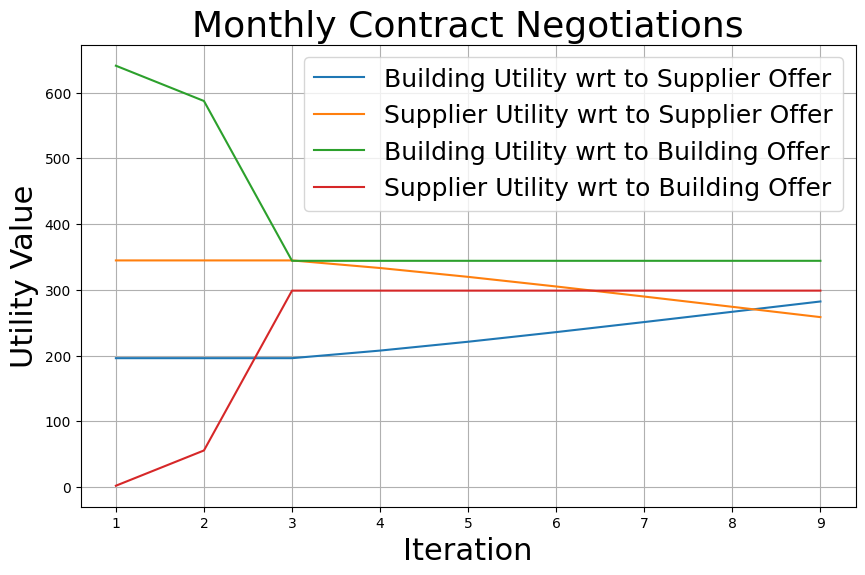

In [ ]:
import matplotlib.pyplot as plt

data = MonthlyContractNegotiation2.utility_history

iterations = [row[0] for row in data]
columns = list(zip(*data))[1:]  # Extract each column, excluding the iteration column

plt.figure(figsize=(10, 6))

for i, column in enumerate(columns):
    if i == 0:
        label = 'Building Utility wrt to Supplier Offer'
    elif i == 1:
        label = 'Supplier Utility wrt to Supplier Offer'
    elif i == 2:
        label = 'Building Utility wrt to Building Offer'
    elif i == 3:
        label = 'Supplier Utility wrt to Building Offer'
    else:
        label = f'Column {i+1}'
    plt.plot(iterations, column, label=label)

plt.xlabel('Iteration',fontsize=22)
plt.ylabel('Utility Value',fontsize=22)
plt.title('Monthly Contract Negotiations',fontsize=26)
plt.legend(fontsize=18)
plt.grid(True)
plt.show()

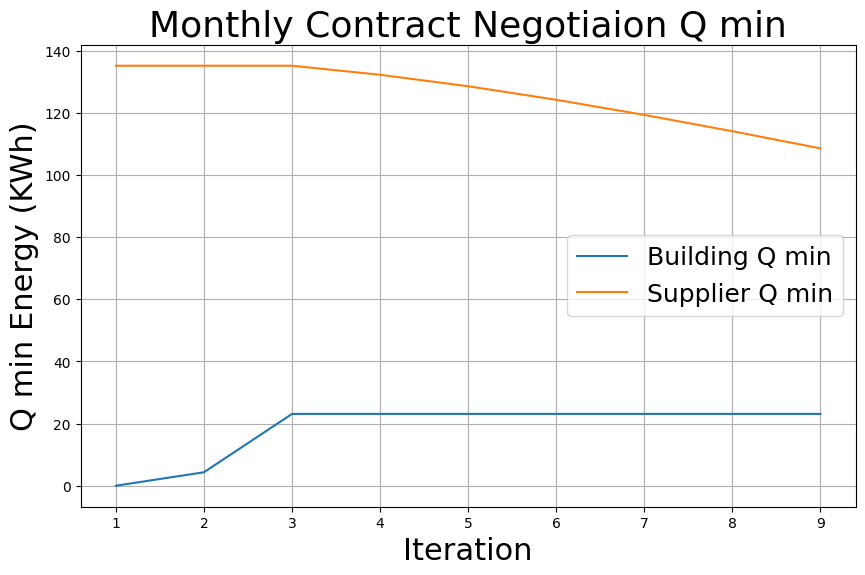

In [ ]:
data = MonthlyContractNegotiation2.Q_min_price_history
iterations = [row[0] for row in data]
columns = list(zip(*data))[1:3]  # Extract each column, excluding the iteration column

plt.figure(figsize=(10, 6))

for i, column in enumerate(columns):
    if i == 0:
        label = 'Building Q min'
    elif i == 1:
        label = 'Supplier Q min'

    plt.plot(iterations, column, label=label)

plt.xlabel('Iteration',fontsize=22)
plt.ylabel('Q min Energy (KWh)',fontsize=22)
plt.title('Monthly Contract Negotiaion Q min',fontsize=26)
plt.legend(fontsize=18)
plt.grid(True)
plt.show()

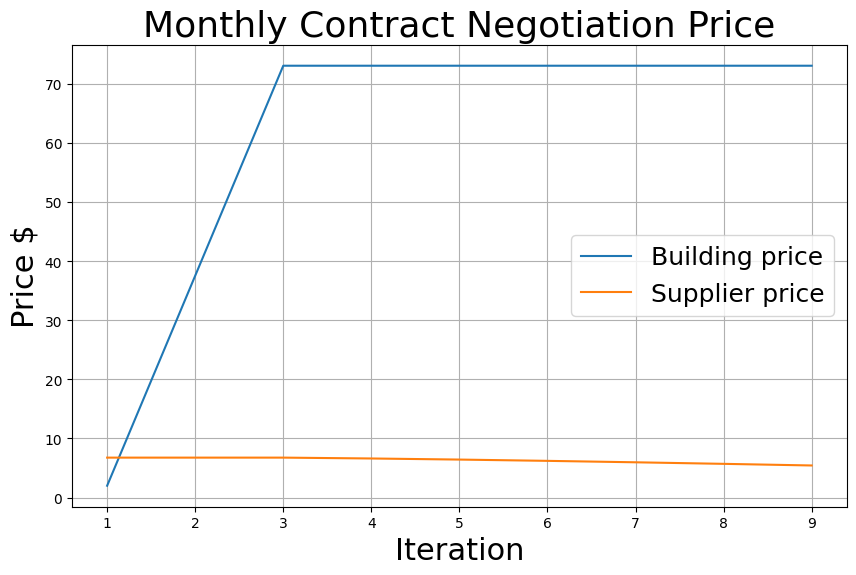

In [ ]:
data = MonthlyContractNegotiation2.Q_min_price_history
iterations = [row[0] for row in data]
columns = list(zip(*data))[3:5]  # Extract each column, excluding the iteration column

plt.figure(figsize=(10, 6))

for i, column in enumerate(columns):
    if i == 0:
        label = 'Building price'
    elif i == 1:
        label = 'Supplier price'

    plt.plot(iterations, column, label=label)

plt.xlabel('Iteration',fontsize=22)
plt.ylabel('Price $',fontsize=22)
plt.title('Monthly Contract Negotiation Price',fontsize=26)
plt.legend(fontsize=18)
plt.grid(True)
plt.show()

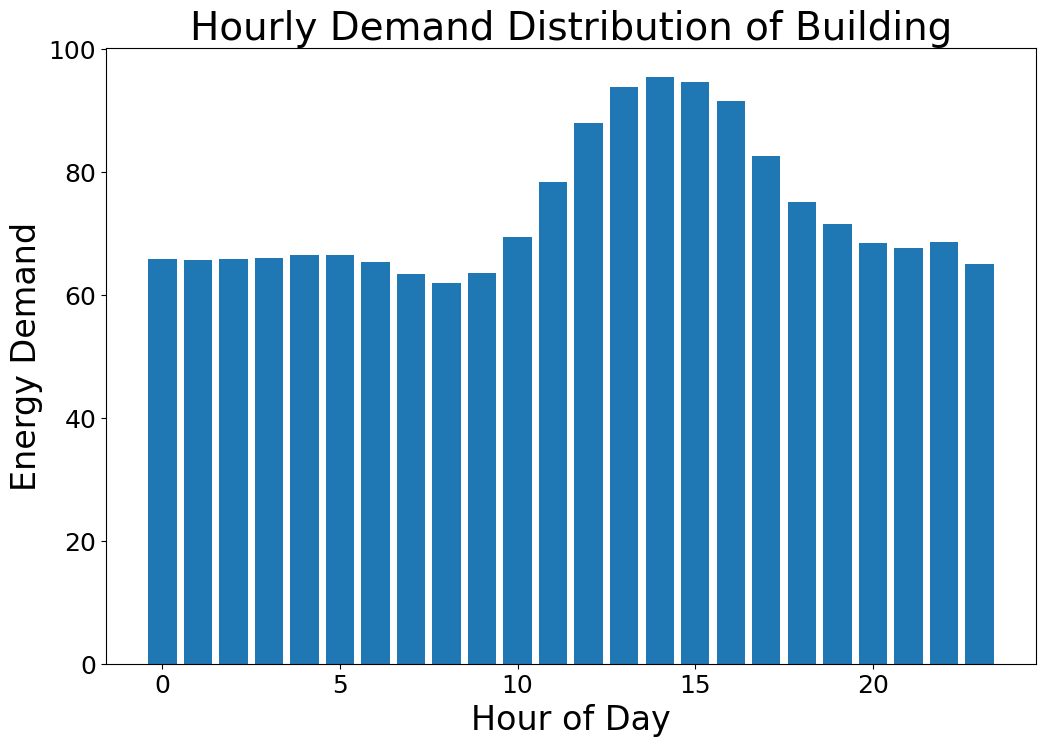

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  # Increasing the size of the figure
plt.bar(range(24), building_agent.hourly_demand)
plt.xlabel('Hour of Day', fontsize=24)
plt.ylabel('Energy Demand', fontsize=24)
plt.title('Hourly Demand Distribution of Building', fontsize=28)
plt.xticks(fontsize=18)  # Increasing the font size of x-axis ticks
plt.yticks(fontsize=18)  # Increasing the font size of y-axis ticks
plt.show()


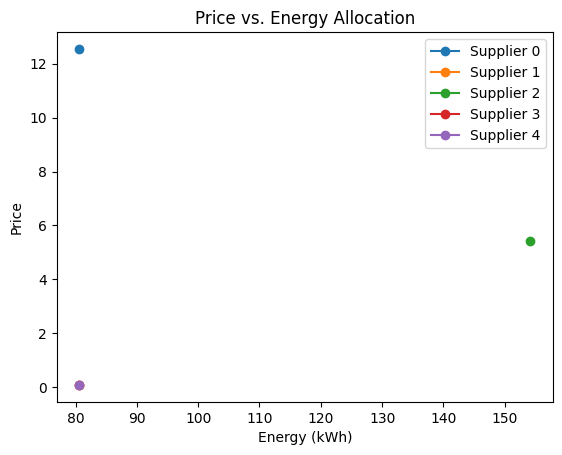

In [ ]:
import matplotlib.pyplot as plt

# Extract data
energies = [Q_max[s].varValue for s in suppliers]
prices = [s.p_max for s in suppliers]

# Create line plot with different colors for each supplier
for i, (energy, price) in enumerate(zip(energies, prices)):
    plt.plot(energy, price, marker='o', color=f'C{i}', label=f'Supplier {i}')

# Add labels and title
plt.xlabel('Energy (kWh)')
plt.ylabel('Price')
plt.title('Price vs. Energy Allocation')

# Create legend
plt.legend()

# Show plot
plt.show()


In [ ]:
building_agent.calculate_bounds(suppliers)


In [ ]:
!pip install pulp

In [ ]:
from pulp import LpProblem, LpMinimize, LpMaximize, LpVariable, lpSum, LpStatus

class DailyContractEstablishment:
    def __init__(self, building_agent, suppliers):
        self.building_agent = building_agent
        self.suppliers = suppliers
        self.consumers = building_agent.consumers
        self.util_b = 0
        self.util_s = []
        self.p_t_sb = []
        self.q_t_bs = []

    # def calc_util(self):
    #     self.util_b = []
    #     self.util_s = []

    #     # for b in self.building_agent:
    #     util = 0
    #     for i in range(len(suppliers)):
    #         util -= b.Q_max_b_s[i]*suppliers[i].p_max
    #     self.util_b.append(util)

    #     for i in range(len(suppliers)):
    #         util = 0
    #         for b in self.building.agent:
    #             util += (1 - self.suppliers.cost_ratio)*self.suppliers.p_max * b.Q_max_b_s[i]
    #         self.util_s.append(util)


    def lp_quantity(self, building_agent, suppliers):
        H = 24 * 30
        Q_MAX_b = building_agent.Q_MAX
        Q_MIN_b = building_agent.Q_MIN
        Qr_MAX_b = 500
        Qr_MIN_b = 100
        sigma_b = building_agent.sigma_b

        prob = LpProblem("Maximise Building Utility", LpMinimize)

        Q_max = LpVariable.dicts("Q_max", suppliers, lowBound=Q_MIN_b, upBound=Q_MAX_b)
        Q_min = LpVariable.dicts("Q_min", suppliers, lowBound=0, upBound=Q_MAX_b)
        Qr_max = LpVariable.dicts("Qr_max", suppliers, lowBound=Qr_MIN_b, upBound=Qr_MAX_b)
        Qr_min = LpVariable.dicts("Qr_min", suppliers, lowBound=0, upBound=Qr_MAX_b)
        prob += lpSum(s.p_max * Q_max[s] + s.calculate_building_penalty(building_agent) * sigma_b * H * (Q_max[s] - Q_min[s] + Qr_max[s] - Qr_min[s]) for s in suppliers)

        # Define constraints
        prob += lpSum(Q_max[s] for s in suppliers) == Q_MAX_b
        prob += lpSum(Q_min[s] for s in suppliers) == Q_MIN_b
        prob += lpSum(Qr_max[s] for s in suppliers) == Qr_MAX_b
        prob += lpSum(Qr_min[s] for s in suppliers) == Qr_MIN_b
        for s in suppliers:
            prob += Q_max[s] >= Q_min[s]
            prob += Qr_max[s] >= Qr_min[s]
            prob += Q_max[s] >= 0
            prob += Q_min[s] >= 0
            prob += Qr_max[s] >= 0
            prob += Qr_min[s] >= 0

        prob.solve()

        self.building_agent.Q_max_b_s = []
        self.building_agent.Q_min_b_s = []
        self.building_agent.Qr_max_b_s = []
        self.building_agent.Qr_min_b_s = []

        for s in self.suppliers:
            s.Q_b_max = Q_max[s].varValue
            s.Qr_b_max = Qr_max[s].varValue
            s.Q_b_min = Q_min[s].varValue
            s.Qr_b_min = Qr_min[s].varValue
            self.building_agent.Q_max_b_s.append(Q_max[s].varValue)
            self.building_agent.Q_min_b_s.append(Q_min[s].varValue)
            self.building_agent.Qr_max_b_s.append(Qr_max[s].varValue)
            self.building_agent.Qr_min_b_s.append(Qr_min[s].varValue)

    def lp_price(self):
        for i in range(len(self.building_agent.Q_max_b_s)):
            p_max = self.suppliers[i].p_max
            # p_min = 0.9*p_max
            prob = LpProblem("Maximize Supplier Utility", LpMaximize)
            price = LpVariable("price", lowBound = 0, upBound = p_max)
            prob += lpSum(price * (self.building_agent.Q_max_b_s[i]+self.building_agent.Qr_max_b_s[i]))
            prob += price >= 0
            prob.solve()
            self.suppliers[i].p_max = price.varValue

    def daily_contract_establishment(self):
        schedules_updated = True
        i = 0
        for j in range(len(self.suppliers)):
                print(f"Supplier {j}: {self.suppliers[j].p_max}")
        while(schedules_updated):
            # calculate q*b and q*b,s
            q_b = self.building_agent.Q_MAX
            q_b_s = self.building_agent.Q_max_b_s
            # send q*b,s to supplier
            self.lp_quantity(self.building_agent, self.suppliers)
            # supplier s determines p*s and pr*s,b, send it to building agent
            self.lp_price()
            # b determines prt based on these prices and forwards to consumer agents
            print(f"Iteration {i}: ")
            for j in range(len(self.suppliers)):
                print(f"Supplier {j}: {self.suppliers[j].p_max}")
            # consumer can change schedule to minimize bill
            schedules_updated = False
            # for b in building_agent:
            for c in building_agent.consumers:
                if (c.update_schedule()==False):
                    schedules_updated = True
            i += 1

    def quantity_received(self):
        total = 0.0
        for x in self.q_t_bs:
            total += x
        return total


dce = DailyContractEstablishment(building_agent, suppliers)
dce.daily_contract_establishment()

Supplier 0: 12.55
Supplier 1: 0.08490325962095835
Supplier 2: 5.429704701085013
Supplier 3: 0.08490325962095835
Supplier 4: 0.08490325962095835
Iteration 0: 
Supplier 0: 12.55
Supplier 1: 0.08490326
Supplier 2: 5.4297047
Supplier 3: 0.08490326
Supplier 4: 0.08490326


/usr/local/lib/python3.10/dist-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [ ]:
building_agent.quantity_received(suppliers)

429.06599399999993

In [ ]:
# print(f"Energy demanded by each consumer: ")
# i = 1
# total = 0
# for c in building_agent.consumers:
#     total += c.energy_demanded()
#     print(f"Consumer {i}: {c.energy_demanded()} units")
#     i+=1
# print(total)

In [ ]:
print(f"Energy demanded by each consumer: ")
i = 1
total_demand = 0.0
total_consumption = 0.0
consumer_consumption = []
for c in building_agent.consumers:
    total_demand+=c.demand[16]
    total_consumption+=c.consumption[16]
    consumer_consumption.append(c.consumption[16])
print(total_demand,total_consumption)


Energy demanded by each consumer: 
91.48978984355927 113.503


In [ ]:
import numpy as np

class Province:
    def __init__(self, name, demand, population,transmission_length):
        self.name = name
        self.demand = demand
        # self.transmission_lines_length = transmission_lines_length
        self.population = population
        self.transmission_length=transmission_length

# # Define provinces
# punjab = Province("Punjab", 11347, 110)
# sindh = Province("Sindh", 3943, 48)
# kpk = Province("KPK", 2054, 30)
# baluchistan = Province("Baluchistan", 962, 12)

# provinces = [punjab, sindh, kpk, baluchistan]

# Define the number of elements in the array
num_elements = 4

# Initialize an empty array
arr = []

# Fill the array with codeine values
for i in range(1, num_elements + 1):
    codeine_value = "c" + str(i)
    arr.append(codeine_value)

# Print the filled array
print(arr)

arr1 = [11347, 3943, 2054, 962]
# arr2 = [110, 48, 30, 12]
# Using list comprehension
arr2 = [3,7,5,2,4,3,8,4,2,5,1,4,3,6,4,4,5,2,8,3,4,3,4,7,5]  #population list
arr3=[150, 200, 250, 300, 350,
    400, 450, 500, 550, 600,
    650, 700, 750, 800, 850,
    900, 950, 1000, 1050, 1100,
    1150, 1200, 1250, 1300, 1350]
 #transmission lines length array
# print(array)



# Initialize an empty list to store Province objects
provinces = []

# Fill the list with Province objects using a loop
for i in range(len(consumers)):
    name = "c" + str(i+1)
    province = Province(name, consumer_consumption[i], arr2[i],arr3[i])
    provinces.append(province)

# Define total power available E
total_power_available = total_demand  # in MW

for province in provinces:
    print(f"Name: {province.name}, Population: {province.population}, Demand: {province.demand}")


['c1', 'c2', 'c3', 'c4']
Name: c1, Population: 3, Demand: 2.556
Name: c2, Population: 7, Demand: 1.741
Name: c3, Population: 5, Demand: 3.143
Name: c4, Population: 2, Demand: 0.0
Name: c5, Population: 4, Demand: 1.533
Name: c6, Population: 3, Demand: 4.285
Name: c7, Population: 8, Demand: 1.51
Name: c8, Population: 4, Demand: 4.335
Name: c9, Population: 2, Demand: 8.228
Name: c10, Population: 5, Demand: 15.094999999999999
Name: c11, Population: 1, Demand: 3.117
Name: c12, Population: 4, Demand: 2.4010000000000002
Name: c13, Population: 3, Demand: 17.505
Name: c14, Population: 6, Demand: 1.806
Name: c15, Population: 4, Demand: 3.4699999999999998
Name: c16, Population: 4, Demand: 2.115
Name: c17, Population: 5, Demand: 1.677
Name: c18, Population: 2, Demand: 1.834
Name: c19, Population: 8, Demand: 3.141
Name: c20, Population: 3, Demand: 1.5949999999999998
Name: c21, Population: 4, Demand: 2.5629999999999997
Name: c22, Population: 3, Demand: 3.24
Name: c23, Population: 4, Demand: 2.425
Na

In [ ]:
# Proportional Rule
def proportional_rule(total_power, demands):
    total_demand = sum(demands)
    return [total_power * (demand / total_demand) for demand in demands]



def bytwo(demands):
  for i in range(len(demands)):
    demands[i]=demands[i]/2


def cea_rule(total_power, demands):
    n = len(demands)
    k = total_power // n  # Initial allocation per demand
    allocations = [min(k, demand) for demand in demands]

    # Adjust allocations if necessary to ensure the total allocated power equals the total power
    while sum(allocations) != total_power:
        if sum(allocations) < total_power:
            # Increase allocations by 1 until the total allocated power reaches the total power
            for i in range(n):
                if allocations[i] < demands[i]:
                    allocations[i] += 1
                    if sum(allocations) == total_power:
                        break
        else:
            # Decrease allocations by 1 until the total allocated power reaches the total power
            for i in range(n):
                if allocations[i] > 0:
                    allocations[i] -= 1
                    if sum(allocations) == total_power:
                        break
            # If decreasing is no longer possible, break the loop
            else:
                break
    return allocations


def cel_rule(total_power, demands):
    n = len(demands)
    k = total_power // n  # Initial allocation per demand
    allocations = [max(0, demand - k) for demand in demands]

    total_allocated = sum(allocations)
    diff = total_power - total_allocated

    if diff != 0:
        # Redistribute the remaining power among the demands
        for i in range(n):
            if diff > 0 and demands[i] > allocations[i]:
                to_add = min(diff, demands[i] - allocations[i])
                allocations[i] += to_add
                diff -= to_add
            elif diff < 0 and allocations[i] > 0:
                to_remove = min(-diff, allocations[i])
                allocations[i] -= to_remove
                diff += to_remove

    return allocations


# Talmud Rule
def talmud_rule(total_power, demands):
    c = sum(demands)
    if total_power <= c//2:
        return cea_rule(total_power, bytwo(demands))
    else:
        # return [demand / 2 + cel for cel in cel_rule(total_power, demands)]
        alloaction=0*len(demands)
        t=demands
        s=sum(demands)
        s=s/2
        bytwo(demands)
        ans=cel_rule(total_power-s, demands)
        result = [x + y for x, y in zip(demands, ans)]
        return result

# Piniles Rule
def piniles_rule(total_power, demands):
    c = sum(demands)
    if total_power <= c//2:
        return cea_rule(total_power, bytwo(demands))
    else:
        # return [demand / 2 + cel for cel in cel_rule(total_power, demands)]
        alloaction=0*len(demands)
        t=demands
        s=sum(demands)
        s=s/2
        bytwo(demands)
        ans=cea_rule(total_power-s, demands)
        result = [x + y for x, y in zip(demands, ans)]
        return result


total_power_available=total_demand

# Apply bankruptcy rules
proportional_allocation = proportional_rule(total_power_available, [province.demand for province in provinces])
cea_allocation = cea_rule(total_power_available, [province.demand for province in provinces])
cel_allocation = cel_rule(total_power_available, [province.demand for province in provinces])
talmud_allocation = talmud_rule(total_power_available, [province.demand for province in provinces])
piniles_allocation = piniles_rule(total_power_available, [province.demand for province in provinces])

# Print allocations
print("Proportional Rule Allocation:")
for i, province in enumerate(provinces):
    print(f"{province.name}: {proportional_allocation[i]} MW")

print("\nConstrained Equal Award (CEA) Rule Allocation:")
for i, province in enumerate(provinces):
    print(f"{province.name}: {cea_allocation[i]} MW")

print("\nConstrained Equal Losses (CEL) Rule Allocation:")
for i, province in enumerate(provinces):
    print(f"{province.name}: {cel_allocation[i]} MW")

print("\nTalmud Rule Allocation:")
for i, province in enumerate(provinces):
    print(f"{province.name}: {talmud_allocation[i]} MW")

print("\nPiniles Rule Allocation:")
for i, province in enumerate(provinces):
    print(f"{province.name}: {piniles_allocation[i]} MW")


Proportional Rule Allocation:
c1: 2.060279489001502 MW
c2: 1.4033437364442938 MW
c3: 2.533434442070313 MW
c4: 0.0 MW
c5: 1.235684059718037 MW
c6: 3.4539505517885116 MW
c7: 1.217144768541576 MW
c8: 3.4942533586938618 MW
c9: 6.6322299043444275 MW
c10: 12.167417404725223 MW
c11: 2.512476982479531 MW
c12: 1.9353407875949165 MW
c13: 14.110012697563102 MW
c14: 1.455737385421249 MW
c15: 2.7970147992313037 MW
c16: 1.7048087320963135 MW
c17: 1.3517561436054455 MW
c18: 1.4783069572882452 MW
c19: 2.531822329794099 MW
c20: 1.285659540280671 MW
c21: 2.0659218819682508 MW
c22: 2.611621887466693 MW
c23: 1.9546861349094844 MW
c24: 13.262847696412642 MW
c25: 6.234038172119568 MW

Constrained Equal Award (CEA) Rule Allocation:
c1: 1.556 MW
c2: 0.7410000000000001 MW
c3: 3.0 MW
c4: 0.0 MW
c5: 0.5329999999999999 MW
c6: 4.0 MW
c7: 0.51 MW
c8: 4.0 MW
c9: 7.0 MW
c10: 7.0 MW
c11: 3.0 MW
c12: 1.4010000000000002 MW
c13: 7.0 MW
c14: 0.806 MW
c15: 3.0 MW
c16: 1.1150000000000002 MW
c17: 0.677 MW
c18: 0.834000000000

In [ ]:
from scipy.optimize import minimize
from functools import reduce


def nash_bargaining(utilities):
    def nash_bargain(x):
        n = len(utilities)
        utility_differences = [x[i] - utilities[i] for i in range(n)]
        return -1 * reduce(lambda a, b: a * b, utility_differences)


    bounds = [(max(0.5 * utilities[i], 0), min(utilities[i], 1)) for i in range(len(utilities))]

    result = minimize(nash_bargain, utilities, bounds=bounds)
    return result.x

def distribute_electricity(claimants, available_electricity):
    num_claimants = len(claimants)
    total_claimed = sum(claimants)
    claimant_utilities = [claimant / total_claimed for claimant in claimants]


    solution = nash_bargaining(claimant_utilities)
    distributed_electricity = [utility * available_electricity for utility in solution]

    return distributed_electricity



nash_homogenous = distribute_electricity([province.demand for province in provinces], total_power_available)
print("Allocated electricity to each claimant:", nash_homogenous)
for i, province in enumerate(provinces):
    print(f"{province.name}: {nash_homogenous[i]} MW")
    # rules_array[i][5]=int((nash_homogenous[i]/provinces[i].demand)*100)

Allocated electricity to each claimant: [2.060279489001502, 1.4033437364442938, 2.533434442070313, 0.0, 1.235684059718037, 3.4539505517885116, 1.217144768541576, 3.4942533586938618, 6.6322299043444275, 12.167417404725223, 2.512476982479531, 1.9353407875949165, 14.110012697563102, 1.455737385421249, 2.7970147992313037, 1.7048087320963135, 1.3517561436054455, 1.4783069572882452, 2.531822329794099, 1.285659540280671, 2.0659218819682508, 2.611621887466693, 1.9546861349094844, 13.262847696412642, 6.234038172119568]
c1: 2.060279489001502 MW
c2: 1.4033437364442938 MW
c3: 2.533434442070313 MW
c4: 0.0 MW
c5: 1.235684059718037 MW
c6: 3.4539505517885116 MW
c7: 1.217144768541576 MW
c8: 3.4942533586938618 MW
c9: 6.6322299043444275 MW
c10: 12.167417404725223 MW
c11: 2.512476982479531 MW
c12: 1.9353407875949165 MW
c13: 14.110012697563102 MW
c14: 1.455737385421249 MW
c15: 2.7970147992313037 MW
c16: 1.7048087320963135 MW
c17: 1.3517561436054455 MW
c18: 1.4783069572882452 MW
c19: 2.531822329794099 MW
c2

In [ ]:
from scipy.optimize import minimize

population_list = np.array([province.population for province in provinces])
disagreement_points = np.array([province.demand / 2 for province in provinces])
def nash_bargaining(utilities):
    def nash_bargain(x):
        u1 = x[0]
        u2 = x[1]
        return -(u1 - utilities[0]) * (u2 - utilities[1])

    initial_guess = [utilities[0], utilities[1]]
    bounds = [(0, utilities[0]), (0, utilities[1])]  # Bounds for utilities

    result = minimize(nash_bargain, initial_guess, bounds=bounds)
    return result.x

def distribute_electricity2(claimants, available_electricity):
    total_population=np.sum(population_list)
    total_demands=np.sum(claimants)
    num_claimants = len(claimants)

    nash_population=[None]*num_claimants
    for i in range(num_claimants):
      minpos = np.argmin(population_list)
      weight=population_list[minpos]/total_population
      min_allocation = max(disagreement_points[minpos], available_electricity * weight)
      allocation = min(min_allocation,claimants[minpos])
      utilities = [allocation / available_electricity, 1 - allocation / available_electricity]
      solution = nash_bargaining(utilities)
      nash_population[minpos]=(solution[0] * available_electricity)
      available_electricity -= solution[0] * available_electricity
      total_population=total_population - population_list[minpos]
      population_list[minpos]=10000000000


    return nash_population



nash_population = distribute_electricity2([province.demand for province in provinces], total_power_available)
print("Allocated electricity to each claimant:", nash_population)
for i, province in enumerate(provinces):
    print(f"{province.name}: {nash_population[i]} MW")
    # rules_array[i][6]=int((nash_population[i]/provinces[i].demand)*100)


Allocated electricity to each claimant: [2.5490284111948296, 1.741, 3.1429999999999993, 0.0, 1.533, 2.5490284111948296, 1.51, 3.2385683808915733, 4.114, 7.5475, 1.5585, 2.4010000000000002, 8.7525, 1.806, 3.285099957607771, 2.115, 1.677, 1.6993522741298865, 3.141, 1.5949999999999998, 2.5629999999999997, 2.3680131292082662, 2.425, 8.641371387477935, 4.4361218633331845]
c1: 2.5490284111948296 MW
c2: 1.741 MW
c3: 3.1429999999999993 MW
c4: 0.0 MW
c5: 1.533 MW
c6: 2.5490284111948296 MW
c7: 1.51 MW
c8: 3.2385683808915733 MW
c9: 4.114 MW
c10: 7.5475 MW
c11: 1.5585 MW
c12: 2.4010000000000002 MW
c13: 8.7525 MW
c14: 1.806 MW
c15: 3.285099957607771 MW
c16: 2.115 MW
c17: 1.677 MW
c18: 1.6993522741298865 MW
c19: 3.141 MW
c20: 1.5949999999999998 MW
c21: 2.5629999999999997 MW
c22: 2.3680131292082662 MW
c23: 2.425 MW
c24: 8.641371387477935 MW
c25: 4.4361218633331845 MW


In [ ]:
from scipy.optimize import minimize

length_of_transmission_lines = np.array([province.transmission_length for province in provinces])

disagreement_points = np.array([province.demand / 2 for province in provinces])
def nash_bargaining(utilities):
    def nash_bargain(x):
        u1 = x[0]
        u2 = x[1]
        return -(u1 - utilities[0]) * (u2 - utilities[1])

    initial_guess = [utilities[0], utilities[1]]
    bounds = [(0, utilities[0]), (0, utilities[1])]  # Bounds for utilities

    result = minimize(nash_bargain, initial_guess, bounds=bounds)
    return result.x

def distribute_electricity3(claimants, available_electricity):
    total_length_of_transmission_lines = np.sum(length_of_transmission_lines)
    num_claimants = len(claimants)

    nash_transmission=[None]*num_claimants
    for i in range(num_claimants):
      # minpos = length_of_transmission_lines.index(min(length_of_transmission_lines))
      minpos = np.argmin(length_of_transmission_lines)

      weight=length_of_transmission_lines[minpos]/total_length_of_transmission_lines
      min_allocation = max(disagreement_points[minpos], available_electricity * weight)
      allocation = min(min_allocation,claimants[minpos])  # Ensure allocation does not exceed demand
      utilities = [allocation / available_electricity, 1 - allocation / available_electricity]
      solution = nash_bargaining(utilities)
      print(solution[0])
      nash_transmission[minpos]=(solution[0] * available_electricity)
      available_electricity -= solution[0] * available_electricity
      total_length_of_transmission_lines=total_length_of_transmission_lines - length_of_transmission_lines[minpos]

      length_of_transmission_lines[minpos]=100000000

    return nash_transmission



nash_transmission = distribute_electricity3([province.demand for province in provinces], total_power_available)
print("Allocated electricity to each claimant:", nash_transmission)
for i, province in enumerate(provinces):
    print(f"{province.name}: {nash_transmission[i]} MW")
#     rules_array[i][7]=int((nash_transmission[i]/provinces[i].demand)*100)

# for row in rules_array:
#     print(row)

0.013968771839844478
0.010752688172043012
0.017609466839023685
0.0
0.017485973175908085
0.02487308902554776
0.017977309649765513
0.03003003003003003
0.05142001839014743
0.09944824118281631
0.043333333333333335
0.0367211965641802
0.13896479137371487
0.03330193706452472
0.06618969443707991
0.04320287122391179
0.03580267185890825
0.040608391101218375
0.0724917313849898
0.039688385601244866
0.06641087019036784
0.08992486376319578
0.07395529468346858
0.49056603773584906
0.4999675861959251
Allocated electricity to each claimant: [1.278, 0.9700192456296696, 1.5715, 0.0, 1.5330000000000001, 2.1425, 1.5100000000000002, 2.4770201380759636, 4.114, 7.547499999999999, 2.9616708532603235, 2.4010000000000002, 8.7525, 1.8059999999999998, 3.4699999999999993, 2.115, 1.677, 1.834, 3.141, 1.5949999999999995, 2.5629999999999997, 3.24, 2.425, 14.896076788140103, 7.734]
c1: 1.278 MW
c2: 0.9700192456296696 MW
c3: 1.5715 MW
c4: 0.0 MW
c5: 1.5330000000000001 MW
c6: 2.1425 MW
c7: 1.5100000000000002 MW
c8: 2.4770

In [ ]:
import numpy as np

# Sample energy allocations for each province based on different rules
rovinces = [f"Province{i}" for i in range(1, 26)]

# Initialize priority vectors for each rule
priority_vectors = {
    'PRO': np.zeros(len(provinces)),
    'CEA': np.zeros(len(provinces)),
    'CEL': np.zeros(len(provinces)),
    'TAL': np.zeros(len(provinces)),
    'Piniles': np.zeros(len(provinces)),
    'nash_homogenous': np.zeros(len(provinces)),
    'nash_population': np.zeros(len(provinces)),
    'nash_transmission': np.zeros(len(provinces))
}

# Iterate over provinces to determine priority vector for each rule
for i, province in enumerate(provinces):
    # Get allocations for the current province
    allocations = [proportional_allocation[i], cea_allocation[i], cel_allocation[i], talmud_allocation[i], piniles_allocation[i],nash_homogenous[i],nash_population[i],nash_transmission[i]]

    # Find the indices of allocations sorted in descending order
    sorted_indices = np.argsort(allocations)[::-1]

    # Assign priorities 1, 2, 3, 4, and 5 to the sorted indices
    for j, idx in enumerate(sorted_indices):
        priority_vectors[list(priority_vectors.keys())[idx]][i] = j + 1

# Print the priority vectors for each rule
for rule, priority_vector in priority_vectors.items():
    print(f"{rule}: {priority_vector}")


results = []

for key, arr in priority_vectors.items():
    diff_sq = np.sum((np.mean(arr) - arr) ** 2)
    root = diff_sq / len(arr)
    results.append((key, root))

print("Results:")
for key, root in results:
    print(f"{key}: dev = {root}")


PRO: [6. 4. 6. 8. 5. 4. 5. 4. 5. 4. 6. 6. 4. 5. 6. 6. 4. 4. 6. 4. 5. 5. 5. 5.
 5.]
CEA: [7. 8. 3. 7. 8. 2. 8. 2. 3. 8. 2. 8. 8. 8. 4. 8. 7. 7. 3. 7. 7. 2. 7. 8.
 2.]
CEL: [1. 2. 1. 6. 3. 1. 3. 1. 1. 1. 1. 3. 1. 2. 1. 3. 8. 8. 8. 8. 8. 8. 8. 3.
 7.]
TAL: [3. 6. 7. 5. 6. 5. 6. 5. 2. 2. 7. 7. 2. 6. 8. 7. 5. 5. 7. 5. 6. 7. 6. 1.
 3.]
Piniles: [4. 7. 4. 4. 7. 6. 7. 7. 6. 5. 4. 4. 5. 7. 7. 4. 6. 6. 4. 6. 3. 3. 3. 6.
 6.]
nash_homogenous: [5. 3. 5. 3. 4. 3. 4. 3. 4. 3. 5. 5. 3. 4. 5. 5. 3. 3. 5. 3. 4. 4. 4. 4.
 4.]
nash_population: [2. 1. 2. 2. 2. 7. 2. 6. 8. 6. 8. 2. 7. 1. 3. 2. 2. 2. 2. 1. 2. 6. 2. 7.
 8.]
nash_transmission: [8. 5. 8. 1. 1. 8. 1. 8. 7. 7. 3. 1. 6. 3. 2. 1. 1. 1. 1. 2. 1. 1. 1. 2.
 1.]
Results:
PRO: dev = 0.9535999999999999
CEA: dev = 6.1024
CEL: dev = 8.7456
TAL: dev = 3.5744
Piniles: dev = 1.9424000000000001
nash_homogenous: dev = 0.6335999999999999
nash_population: dev = 6.441599999999999
nash_transmission: dev = 7.782399999999999


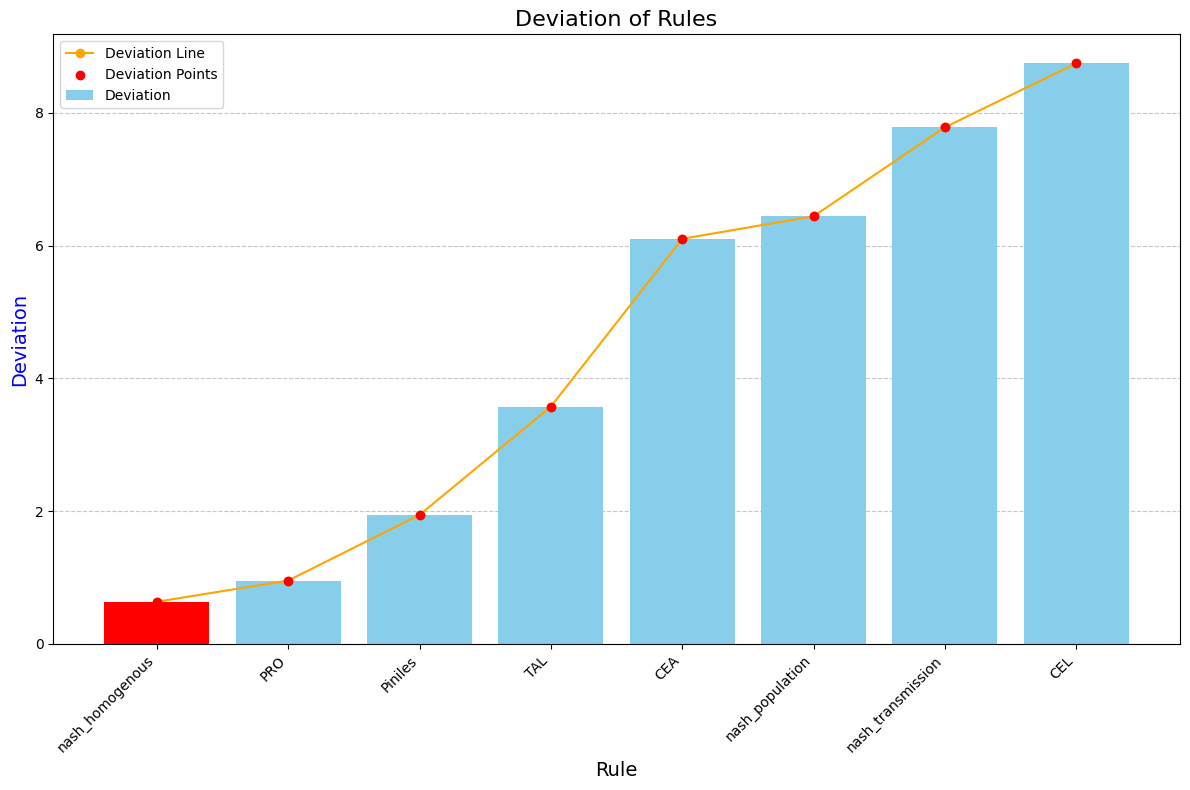

In [ ]:
import matplotlib.pyplot as plt

# Sample data (results array)

# Sort results by deviation
results.sort(key=lambda x: x[1])

# Extract rule names and deviations
rules = [x[0] for x in results]
deviations = [x[1] for x in results]

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Bar plot for deviations
ax.bar(rules, deviations, color='skyblue', label='Deviation', zorder=2)

# Line plot for deviations
ax.plot(rules, deviations, color='orange', marker='o', label='Deviation Line', zorder=3)

# Scatter plot for deviations
ax.scatter(rules, deviations, color='red', label='Deviation Points', zorder=4)

# Highlight the minimum deviation rule
min_rule, min_dev = results[0]
ax.bar(min_rule, min_dev, color='red', zorder=5)

# Set labels and title
ax.set_ylabel('Deviation', color='blue', fontsize=14)
ax.set_xlabel('Rule', fontsize=14)
plt.title('Deviation of Rules', fontsize=16)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Show legend
plt.legend(loc='upper left')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()